ここに学習で必要なパラメータを定義する

In [1]:
import numpy as np
import datetime
import os
import copy

# Parametor about Sensor
SensorNum=1 # Sensor number
#SensorAxis='AccX' # Axis

# Parametor about  " Sliding Window " 
WindowWidth =np.array([128,256,512,1024,2048,4096]) # Window Width
SlidingWidth =WindowWidth/4 #sliding window

# Parametor about Neural Network
AEDimention = 16

# Define Data Name
DATE= str( datetime.date.today() )+'/'
TITLE="Participants01_First_1/"
Label = ['LeftHand','RightHand','LeftLeg','Rightleg','West','Chest']

# Parametor about " Data Path"
DataPath = "/media/takeyama/Transfer/02_ActivityResearch/Paticipants01/01_First/20161018-105301/mem/"
StorePath = "/home/takeyama/Documents/"

if not os.path.exists(StorePath+TITLE+'dictionary/'): 
    os.makedirs(StorePath+TITLE+'dictionary/')
DictionaryDataPath=StorePath+TITLE+'dictionary/'

if not os.path.exists(StorePath+TITLE+DATE+'window/'): 
    os.makedirs(StorePath+TITLE+DATE+'window/')
WindowDataPath=StorePath+TITLE+DATE+'window/'

if not os.path.exists(StorePath+TITLE+DATE+'studyOutput/'): 
    os.makedirs(StorePath+TITLE+DATE+'studyOutput/')
StudyOutputPath=StorePath+TITLE+DATE+'studyOutput/'

if not os.path.exists(StorePath+TITLE+DATE+'parametor/'): 
    os.makedirs(StorePath+TITLE+DATE+'parametor/')
ParametorPath=StorePath+TITLE+DATE+'parametor/'

if not os.path.exists(StorePath+TITLE+DATE+'result/'): 
    os.makedirs(StorePath++TITLE+DATE+'result/')
ResultPath=StorePath+TITLE+DATE+'result/'

if not os.path.exists(StorePath+TITLE+DATE+'graph/'): 
    os.makedirs(StorePath+TITLE+DATE+'graph/')
GraphPath=StorePath+TITLE+DATE+'graph/'

**センサデータの読み込み**

In [2]:
# センサデータのcsvファイル名をリストに集約する関数
def SensorDataFileNameList(path):
    l = os.listdir(DataPath)
    FilePath =[]
    SensorName = []
    
    for n in range(len(l)):
        if (l[n][:4].find('mem-') != -1):
            FilePath.append(l[n])
            SensorName.append(l[n][4:15])
    
    return FilePath,SensorName

CSVを読み込んで，CSVの中身を辞書型で表現する．

In [3]:
def ImportCSV(csv_file,SensorName,mode='Round'):
    import pandas as pd
    '''
    ~Argument~
    csv_file -> ファイル名 
    mode Round -> 四捨五入
         Roundup -> 切り上げ
         Rounddown -> 切り捨て
    
    ~Conversion~
    Acc Data  [0.1mG]=>[G]
    Gyr Data  [0.01dps]=>[dps]   ...dps=degree per second
    '''
    # data dictionary 
    RawData={}   
    AccConversion = 0.1 * 0.001
    GyrConversion = 0.01
    
    # design dataframe and import csv
    data = pd.read_csv(csv_file)
    data.columns=[u'Type',u'Time',u'AccX',u'AccY',u'AccZ',u'GyrX',u'GyrY',u'GyrZ']
    data = data[ data['Type']=='ags']

    # convert numpy.darray 

    AccX=data.AccX.values*AccConversion
    AccY=data.AccY.values*AccConversion
    AccZ=data.AccZ.values*AccConversion
    
    GyrX=data.GyrX.values*GyrConversion
    GyrY=data.GyrY.values*GyrConversion
    GyrZ=data.GyrZ.values*GyrConversion

    # regist each raw data 
    RawData['AccX'] = AccX
    RawData['AccY'] = AccY
    RawData['AccZ'] = AccZ
    RawData['GyrX'] = GyrX
    RawData['GyrY'] = GyrY
    RawData['GyrZ'] = GyrZ
    RawData['Name'] = SensorName

    RawData['Time'] = data.Time.values

    return RawData

In [4]:
import processing
import window

Label = ['LeftHand','RightHand','LeftLeg','Rightleg','West','Chest']

DataFileNameList,SensorName=SensorDataFileNameList(DataPath)
l=[]
for i in range( len(DataFileNameList) ):
    l.append( ImportCSV(DataPath+DataFileNameList[i],Label[i]) )

**出力チェック**

In [5]:
l[0]

{'AccX': array([-1.0102, -0.9973, -0.9951, ..., -0.1794, -0.1789, -0.1792]),
 'AccY': array([ 0.0828,  0.0782,  0.0765, ...,  0.3201,  0.3221,  0.3238]),
 'AccZ': array([-0.2692, -0.269 , -0.2661, ...,  0.8967,  0.8938,  0.883 ]),
 'GyrX': array([ 82.15,  81.2 ,  80.26, ...,   0.39,   0.54,   0.6 ]),
 'GyrY': array([ 13.45,  13.8 ,  14.  , ...,   5.57,   6.14,   6.49]),
 'GyrZ': array([ 12.8 ,  12.84,  12.7 , ...,   1.38,   1.65,   1.96]),
 'Name': 'LeftHand',
 'Time': array([36290378, 36290379, 36290380, ..., 37394180, 37394181, 37394182])}

In [6]:
l[1]

{'AccX': array([-0.9539, -0.9524, -0.9473, ..., -0.1909, -0.2337, -0.2002]),
 'AccY': array([ 0.1487,  0.1496,  0.1555, ...,  0.103 ,  0.1623,  0.2256]),
 'AccZ': array([-0.1474, -0.1401, -0.1452, ...,  0.9062,  0.9697,  0.9928]),
 'GyrX': array([-25.06, -24.22, -23.33, ...,  -5.12,  -5.44,  -6.07]),
 'GyrY': array([ 31.23,  30.85,  30.3 , ...,  -4.62,  -7.02, -13.01]),
 'GyrZ': array([-9.67, -9.76, -9.65, ...,  3.3 ,  3.5 ,  7.44]),
 'Name': 'RightHand',
 'Time': array([36290413, 36290414, 36290415, ..., 37400598, 37400599, 37400600])}

In [7]:
l[2]

{'AccX': array([ 0.974 ,  0.9793,  0.9776, ..., -0.3304, -0.3338, -0.3377]),
 'AccY': array([-0.0664, -0.0639, -0.0654, ...,  0.6701,  0.664 ,  0.6625]),
 'AccZ': array([-0.2318, -0.2291, -0.2279, ...,  0.6841,  0.6787,  0.6878]),
 'GyrX': array([ 1.42,  1.44,  1.36, ...,  1.03,  1.32,  1.35]),
 'GyrY': array([-1.57, -1.62, -1.8 , ...,  6.48,  6.54,  6.54]),
 'GyrZ': array([ 0.6 ,  0.61,  0.61, ...,  6.14,  6.1 ,  5.9 ]),
 'Name': 'LeftLeg',
 'Time': array([36289454, 36289455, 36289456, ..., 37383543, 37383544, 37383545])}

In [8]:
l[3]

{'AccX': array([ 0.9239,  0.9266,  0.9291, ..., -0.3042, -0.3091, -0.3069]),
 'AccY': array([-0.1819, -0.1841, -0.1831, ...,  0.204 ,  0.2096,  0.2074]),
 'AccZ': array([-0.3983, -0.409 , -0.4095, ...,  0.8953,  0.8936,  0.8948]),
 'GyrX': array([-0.23, -0.11, -0.17, ...,  0.24,  0.13, -0.02]),
 'GyrY': array([-1.4 , -1.39, -1.51, ..., -1.13, -1.05, -1.22]),
 'GyrZ': array([-0.09, -0.08,  0.11, ...,  2.23,  2.3 ,  2.4 ]),
 'Name': 'Rightleg',
 'Time': array([36289502, 36289503, 36289504, ..., 37375672, 37375673, 37375674])}

In [9]:
l[4]

{'AccX': array([ 0.8437,  0.8496,  0.8493, ..., -0.0044, -0.0108, -0.0078]),
 'AccY': array([-0.0334, -0.0337, -0.0364, ...,  0.0795,  0.0849,  0.089 ]),
 'AccZ': array([-0.5486, -0.542 , -0.5413, ...,  0.9938,  0.9762,  0.9752]),
 'GyrX': array([-3.27, -3.26, -3.18, ..., -0.66, -0.6 , -0.81]),
 'GyrY': array([ 2.89,  2.78,  2.73, ...,  0.41,  0.45,  0.32]),
 'GyrZ': array([ 2.35,  2.15,  2.16, ..., -0.19, -0.09, -0.04]),
 'Name': 'West',
 'Time': array([36289542, 36289543, 36289544, ..., 37399101, 37399102, 37399103])}

読み込んだセンサデータの時系列を整理する．
→具体的には，センサデータのスタート時間とゴール時間を整える．


In [10]:
def MakeCommonSection(inputDataArray):
    # 共通区間のスタート時間、ゴール時間を求める
    # スタート時間を求める
    startTime = min(inputDataArray[0]['Time'])
    
    for i in range(len(inputDataArray)):
        if startTime < min(inputDataArray[i]['Time']):
            startTime = min(inputDataArray[i]['Time'])
    
    # ゴール時間を求める
    goalTime = max(inputDataArray[0]['Time'])
    
    for i in range(len(inputDataArray)):
        if goalTime > max(inputDataArray[i]['Time']):
            goalTime = max(inputDataArray[i]['Time'])

    # 共通区間のスタート時間のインデックス、ゴール時間のインデックスを探索する
    def CalcSearchIndexFromTime(data, keyTime):
        """
        data　辞書型
        keyTime data['Time']の中の探す値
        """
        count = 0
        for i in range(0, len(data['Time'])):
            if keyTime == data['Time'][i]:
                print str(keyTime)+' is much in the index  whose number is '+str(i)
                return i
            
    startIndex = np.array([])
    goalIndex = np.array([])
    for obj in inputDataArray:
        print 'start'
        startIndex = np.append(startIndex, CalcSearchIndexFromTime(obj, startTime) ).astype(int)
        print 'goal'
        goalIndex = np.append(goalIndex, CalcSearchIndexFromTime(obj, goalTime) ).astype(int)

    tmp={}
    comDataArray =[]
    key={}

    # センサデータすべて（時刻、加速度、角速度）に対して共通区間のみのデータを抽出
    for number,iDA in enumerate( inputDataArray ):

        tmp['AccX'] = copy.deepcopy( iDA['AccX'][startIndex[number]:goalIndex[number]] )
        tmp['AccY'] = copy.deepcopy( iDA['AccY'][startIndex[number]:goalIndex[number]] )
        tmp['AccZ'] = copy.deepcopy( iDA['AccZ'][startIndex[number]:goalIndex[number]] )
        tmp['GyrX'] = copy.deepcopy( iDA['GyrX'][startIndex[number]:goalIndex[number]] )
        tmp['GyrY'] = copy.deepcopy( iDA['GyrY'][startIndex[number]:goalIndex[number]] )
        tmp['GyrZ'] = copy.deepcopy( iDA['GyrZ'][startIndex[number]:goalIndex[number]] )
        tmp['Time'] = copy.deepcopy( iDA['Time'][startIndex[number]:goalIndex[number]] )
        tmp['Name'] = copy.deepcopy( iDA['Name'] )
        comDataArray.append(copy.deepcopy(tmp) )    
        key[ tmp['Name'] ] = number
       
    return key,comDataArray

In [11]:
TrimKey,TrimData = MakeCommonSection(l)

start
36290413 is much in the index  whose number is 35
goal
37368283 is much in the index  whose number is 1077905
start
36290413 is much in the index  whose number is 0
goal
37368283 is much in the index  whose number is 1077870
start
36290413 is much in the index  whose number is 959
goal
37368283 is much in the index  whose number is 1078829
start
36290413 is much in the index  whose number is 911
goal
37368283 is much in the index  whose number is 1078781
start
36290413 is much in the index  whose number is 871
goal
37368283 is much in the index  whose number is 1078741
start
36290413 is much in the index  whose number is 834
goal
37368283 is much in the index  whose number is 1078704


In [12]:
type( TrimData[0] )

dict

辞書型に変換したデータをnp.savez関数でnpz型に圧縮し，保存する

In [13]:
for i in range(6):
    np.savez(DictionaryDataPath+TrimData[i]['Name'],data=TrimData[i])

ライブラリをimportする

In [14]:
# FFT library
from scipy import fftpack
from scipy import signal

# Graph Plot
import matplotlib.pyplot as plt

# Generate WindowFrame Function
from mymodule import window

# timer
import time

%matplotlib inline

In [15]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, RMSprop, Nadam
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


**Phase1 計測データの取得**

ここで行うことは，学習に用いるnpzファイルを読み込む

In [16]:
'LeftHand' in Label

True

In [17]:
l = os.listdir(DictionaryDataPath)
print l

['West.npz', 'Rightleg.npz', 'Chest.npz', 'RightHand.npz', 'LeftHand.npz', 'LeftLeg.npz']


In [18]:
def LoadDataFromNPZ(Path,DataName):
    """
    Path 　　NPZファイルがあるパス
    DataName 名前，ここでは装着した部位を指す
    """
    Label = ['LeftHand','RightHand','LeftLeg','RightLeg','West','Chest']
    
    # check which DataName is wrong
    if not DataName in Label: return -1
    
    for i in range( len(Label) ):
        if DataName == Label[i]:
            return np.load(Path+DataName+'.npz')['data'][()]

**Phase2 window flame 作成 & Learning**

In [19]:
optimizers = [SGD, Adadelta, Adamax, Adam, Adagrad,  RMSprop, Nadam]
optimArray = ["SGD", "Adadelta","Adamax", "Adam", "Adagrad",  "RMSprop", "Nadam"]

今回は，テストとして加速度Ｘのデータを使って学習する
ウィンドウ幅，スライド幅は最小に定義したベクトルの値


In [20]:
def AutoEncoder(TrainWindow,TestWindow,dim,opt,cname,batchSize=32):
    input_img = Input(shape=( TrainWindow.shape[1] ,))
    encoded = Dense(dim, activation='tanh')(input_img)
    decoded = Dense( TrainWindow.shape[1] , activation='linear')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    encoded_input = Input(shape=(dim,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=opt, loss='mse')

    #plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    hist = autoencoder.fit(TrainWindow, TestWindow,
                    nb_epoch=50,
                    verbose=2,
                    batch_size=batchSize,
                    shuffle=True,
                    validation_data=(TrainWindow, TestWindow),
                    callbacks=[early_stopping])
    time.sleep(0.1)

    encoded_imgs = encoder.predict(TrainWindow,batch_size=batchSize,verbose=1)
    decoded_imgs = decoder.predict(encoded_imgs,batch_size=batchSize,verbose=1)

    np.savez(StudyOutputPath+cname+'_Encoded',data=encoded_imgs)
    np.savez(StudyOutputPath+cname+'_Decoded',data=decoded_imgs)

    # save model and wights
    json_string = encoder.to_json()
    open(StudyOutputPath+cname+'_Encoded'+'.json', 'w').write(json_string)
    encoder.save_weights(ParametorPath+cname+'Encode_weights.h5',overwrite=True)

    json_string = decoder.to_json()
    open(StudyOutputPath+cname+'_Decoded'+'.json', 'w').write(json_string)
    decoder.save_weights(ParametorPath+cname+'Decord_weights.h5',overwrite=True)

    json_string = autoencoder.to_json()
    open(StudyOutputPath+cname+'_Net'+'.json', 'w').write(json_string)
    autoencoder.save_weights(ParametorPath+cname+'Net_weights.h5',overwrite=True)

    # plot loss
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']

    nb_epoch = len(loss)
    plt.plot(range(nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
    plt.legend(loc='best', fontsize=10)
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.savefig(ResultPath+cname+'.png')
    plt.show()

/home/takeyama/.pyenv/versions/2.7.11/envs/takeyama/lib/python2.7/site-packages/mymodule/window.py:64: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.window = source[start:goal].T
  0%|          | 0/8419 [00:00<?, ?it/s]/home/takeyama/.pyenv/versions/2.7.11/envs/takeyama/lib/python2.7/site-packages/mymodule/window.py:70: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  nextFrame = source[start:goal].T
 17%|█▋        | 1412/8419 [00:00<00:00, 14108.14it/s]

AccX is registed now
Build Complete
Source shape is(1077870,)
window frames num =16839
offset=808318.0


100%|██████████| 8419/8419 [00:04<00:00, 1722.54it/s]


hiden node = 16
_dim=0016_Win=0128_Sld=0032_SGD
Train on 8420 samples, validate on 8420 samples
Epoch 1/50
0s - loss: 0.5845 - val_loss: 0.3342
Epoch 2/50
0s - loss: 0.2041 - val_loss: 0.1141
Epoch 3/50
0s - loss: 0.0754 - val_loss: 0.0496
Epoch 4/50
0s - loss: 0.0387 - val_loss: 0.0314
Epoch 5/50
0s - loss: 0.0282 - val_loss: 0.0259
Epoch 6/50
0s - loss: 0.0246 - val_loss: 0.0236
Epoch 7/50
0s - loss: 0.0228 - val_loss: 0.0220
Epoch 8/50
0s - loss: 0.0214 - val_loss: 0.0207
Epoch 9/50
0s - loss: 0.0201 - val_loss: 0.0195
Epoch 10/50
0s - loss: 0.0189 - val_loss: 0.0183
Epoch 11/50
0s - loss: 0.0178 - val_loss: 0.0174
Epoch 12/50
0s - loss: 0.0170 - val_loss: 0.0165
Epoch 13/50
0s - loss: 0.0162 - val_loss: 0.0158
Epoch 14/50
0s - loss: 0.0155 - val_loss: 0.0152
Epoch 15/50
0s - loss: 0.0150 - val_loss: 0.0147
Epoch 16/50
0s - loss: 0.0145 - val_loss: 0.0143
Epoch 17/50
0s - loss: 0.0141 - val_loss: 0.0139
Epoch 18/50
0s - loss: 0.0137 - val_loss: 0.0135
Epoch 19/50
0s - loss: 0.0134 -

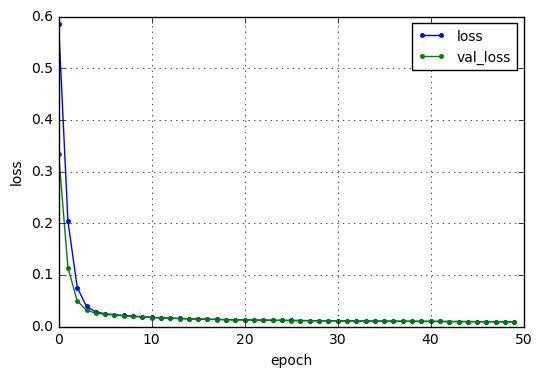

hiden node = 16
_dim=0016_Win=0128_Sld=0032_Adadelta
Train on 8420 samples, validate on 8420 samples
Epoch 1/50
0s - loss: 0.2473 - val_loss: 0.0224
Epoch 2/50
0s - loss: 0.0138 - val_loss: 0.0133
Epoch 3/50
0s - loss: 0.0097 - val_loss: 0.0101
Epoch 4/50
0s - loss: 0.0088 - val_loss: 0.0080
Epoch 5/50
0s - loss: 0.0079 - val_loss: 0.0065
Epoch 6/50
0s - loss: 0.0071 - val_loss: 0.0092
Epoch 7/50
0s - loss: 0.0067 - val_loss: 0.0072
Epoch 8/50
0s - loss: 0.0064 - val_loss: 0.0053
Epoch 9/50
0s - loss: 0.0063 - val_loss: 0.0067
Epoch 10/50
0s - loss: 0.0057 - val_loss: 0.0092
Epoch 11/50
0s - loss: 0.0057 - val_loss: 0.0044
Epoch 12/50
0s - loss: 0.0059 - val_loss: 0.0044
Epoch 13/50
0s - loss: 0.0052 - val_loss: 0.0062
Epoch 14/50
0s - loss: 0.0051 - val_loss: 0.0069
Epoch 15/50
0s - loss: 0.0050 - val_loss: 0.0140
Epoch 16/50
0s - loss: 0.0049 - val_loss: 0.0040
Epoch 17/50
0s - loss: 0.0048 - val_loss: 0.0080
Epoch 18/50
0s - loss: 0.0043 - val_loss: 0.0060
Epoch 19/50
0s - loss: 0.0

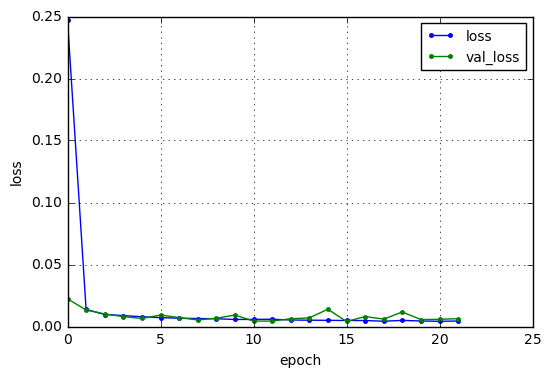

hiden node = 16
_dim=0016_Win=0128_Sld=0032_Adamax
Train on 8420 samples, validate on 8420 samples
Epoch 1/50
0s - loss: 0.1032 - val_loss: 0.0131
Epoch 2/50
0s - loss: 0.0110 - val_loss: 0.0097
Epoch 3/50
0s - loss: 0.0088 - val_loss: 0.0085
Epoch 4/50
0s - loss: 0.0077 - val_loss: 0.0073
Epoch 5/50
0s - loss: 0.0071 - val_loss: 0.0075
Epoch 6/50
0s - loss: 0.0064 - val_loss: 0.0062
Epoch 7/50
0s - loss: 0.0057 - val_loss: 0.0053
Epoch 8/50
0s - loss: 0.0049 - val_loss: 0.0045
Epoch 9/50
0s - loss: 0.0043 - val_loss: 0.0042
Epoch 10/50
0s - loss: 0.0038 - val_loss: 0.0035
Epoch 11/50
0s - loss: 0.0034 - val_loss: 0.0036
Epoch 12/50
0s - loss: 0.0030 - val_loss: 0.0027
Epoch 13/50
0s - loss: 0.0026 - val_loss: 0.0023
Epoch 14/50
0s - loss: 0.0023 - val_loss: 0.0024
Epoch 15/50
0s - loss: 0.0020 - val_loss: 0.0019
Epoch 16/50
0s - loss: 0.0018 - val_loss: 0.0017
Epoch 17/50
0s - loss: 0.0016 - val_loss: 0.0014
Epoch 18/50
0s - loss: 0.0014 - val_loss: 0.0016
Epoch 19/50
0s - loss: 0.001

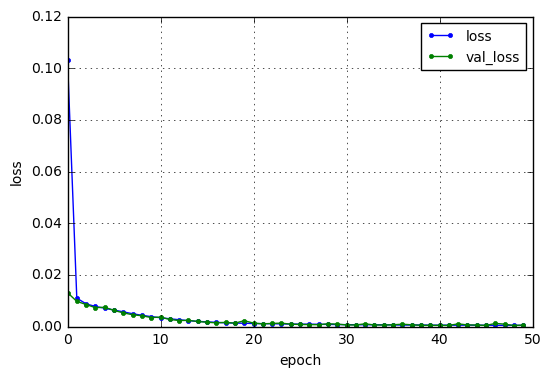

hiden node = 16
_dim=0016_Win=0128_Sld=0032_Adam
Train on 8420 samples, validate on 8420 samples
Epoch 1/50
0s - loss: 0.1157 - val_loss: 0.0119
Epoch 2/50
0s - loss: 0.0098 - val_loss: 0.0086
Epoch 3/50
0s - loss: 0.0079 - val_loss: 0.0074
Epoch 4/50
0s - loss: 0.0069 - val_loss: 0.0064
Epoch 5/50
0s - loss: 0.0062 - val_loss: 0.0057
Epoch 6/50
0s - loss: 0.0054 - val_loss: 0.0049
Epoch 7/50
0s - loss: 0.0047 - val_loss: 0.0042
Epoch 8/50
0s - loss: 0.0042 - val_loss: 0.0039
Epoch 9/50
0s - loss: 0.0037 - val_loss: 0.0037
Epoch 10/50
0s - loss: 0.0034 - val_loss: 0.0032
Epoch 11/50
0s - loss: 0.0030 - val_loss: 0.0027
Epoch 12/50
0s - loss: 0.0027 - val_loss: 0.0024
Epoch 13/50
0s - loss: 0.0025 - val_loss: 0.0022
Epoch 14/50
0s - loss: 0.0023 - val_loss: 0.0022
Epoch 15/50
0s - loss: 0.0020 - val_loss: 0.0019
Epoch 16/50
0s - loss: 0.0019 - val_loss: 0.0018
Epoch 17/50
0s - loss: 0.0017 - val_loss: 0.0015
Epoch 18/50
0s - loss: 0.0016 - val_loss: 0.0019
Epoch 19/50
0s - loss: 0.0015 

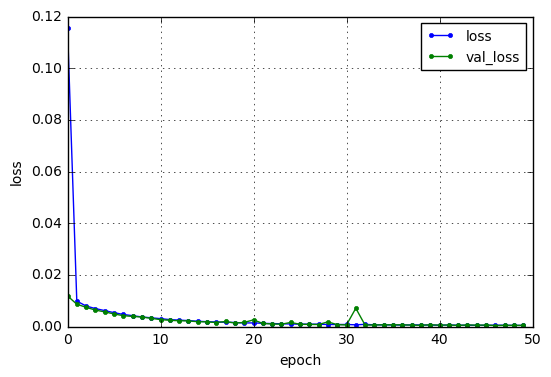

hiden node = 16
_dim=0016_Win=0128_Sld=0032_Adagrad
Train on 8420 samples, validate on 8420 samples
Epoch 1/50
0s - loss: 0.0378 - val_loss: 0.0121
Epoch 2/50
0s - loss: 0.0097 - val_loss: 0.0098
Epoch 3/50
0s - loss: 0.0085 - val_loss: 0.0078
Epoch 4/50
0s - loss: 0.0077 - val_loss: 0.0075
Epoch 5/50
0s - loss: 0.0074 - val_loss: 0.0101
Epoch 6/50
0s - loss: 0.0069 - val_loss: 0.0064
Epoch 7/50
0s - loss: 0.0065 - val_loss: 0.0061
Epoch 8/50
0s - loss: 0.0063 - val_loss: 0.0059
Epoch 9/50
0s - loss: 0.0058 - val_loss: 0.0055
Epoch 10/50
0s - loss: 0.0056 - val_loss: 0.0114
Epoch 11/50
0s - loss: 0.0054 - val_loss: 0.0059
Epoch 12/50
0s - loss: 0.0051 - val_loss: 0.0048
Epoch 13/50
0s - loss: 0.0049 - val_loss: 0.0046
Epoch 14/50
0s - loss: 0.0047 - val_loss: 0.0046
Epoch 15/50
0s - loss: 0.0045 - val_loss: 0.0044
Epoch 16/50
0s - loss: 0.0044 - val_loss: 0.0045
Epoch 17/50
0s - loss: 0.0042 - val_loss: 0.0041
Epoch 18/50
0s - loss: 0.0041 - val_loss: 0.0047
Epoch 19/50
0s - loss: 0.00

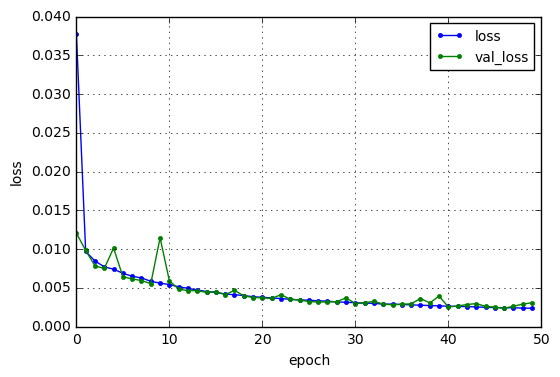

hiden node = 16
_dim=0016_Win=0128_Sld=0032_RMSprop
Train on 8420 samples, validate on 8420 samples
Epoch 1/50
0s - loss: 0.0764 - val_loss: 0.0102
Epoch 2/50
0s - loss: 0.0099 - val_loss: 0.0072
Epoch 3/50
0s - loss: 0.0091 - val_loss: 0.0265
Epoch 4/50
0s - loss: 0.0083 - val_loss: 0.0069
Epoch 5/50
0s - loss: 0.0078 - val_loss: 0.0104
Epoch 6/50
0s - loss: 0.0074 - val_loss: 0.0058
Epoch 7/50
0s - loss: 0.0071 - val_loss: 0.0080
Epoch 8/50
0s - loss: 0.0070 - val_loss: 0.0043
Epoch 9/50
0s - loss: 0.0067 - val_loss: 0.0047
Epoch 10/50
0s - loss: 0.0067 - val_loss: 0.0071
Epoch 11/50
0s - loss: 0.0064 - val_loss: 0.0133
Epoch 12/50
0s - loss: 0.0063 - val_loss: 0.0076
Epoch 13/50
0s - loss: 0.0061 - val_loss: 0.0040
Epoch 14/50
0s - loss: 0.0060 - val_loss: 0.0038
Epoch 15/50
0s - loss: 0.0060 - val_loss: 0.0084
Epoch 16/50
0s - loss: 0.0059 - val_loss: 0.0074
Epoch 17/50
0s - loss: 0.0057 - val_loss: 0.0042
Epoch 18/50
0s - loss: 0.0057 - val_loss: 0.0045
Epoch 19/50
0s - loss: 0.00

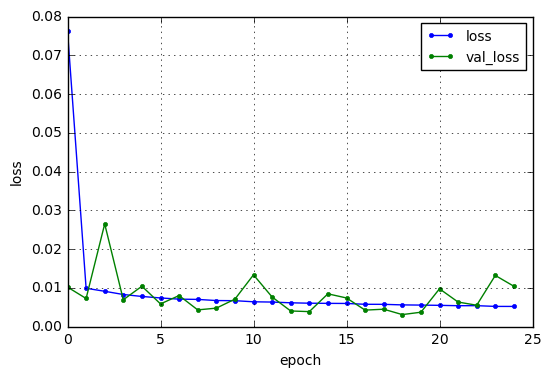

hiden node = 16
_dim=0016_Win=0128_Sld=0032_Nadam
Train on 8420 samples, validate on 8420 samples
Epoch 1/50
0s - loss: 0.0640 - val_loss: 0.0217
Epoch 2/50
0s - loss: 0.0112 - val_loss: 0.0081
Epoch 3/50
0s - loss: 0.0102 - val_loss: 0.0076
Epoch 4/50
0s - loss: 0.0090 - val_loss: 0.0082
Epoch 5/50
0s - loss: 0.0082 - val_loss: 0.0114
Epoch 6/50
0s - loss: 0.0076 - val_loss: 0.0061
Epoch 7/50
0s - loss: 0.0070 - val_loss: 0.0064
Epoch 8/50
0s - loss: 0.0067 - val_loss: 0.0087
Epoch 9/50
0s - loss: 0.0061 - val_loss: 0.0039
Epoch 10/50
0s - loss: 0.0058 - val_loss: 0.0060
Epoch 11/50
0s - loss: 0.0054 - val_loss: 0.0127
Epoch 12/50
0s - loss: 0.0053 - val_loss: 0.0033
Epoch 13/50
0s - loss: 0.0046 - val_loss: 0.0041
Epoch 14/50
0s - loss: 0.0045 - val_loss: 0.0107
Epoch 15/50
0s - loss: 0.0042 - val_loss: 0.0024
Epoch 16/50
0s - loss: 0.0041 - val_loss: 0.0033
Epoch 17/50
0s - loss: 0.0036 - val_loss: 0.0081
Epoch 18/50
0s - loss: 0.0038 - val_loss: 0.0025
Epoch 19/50
0s - loss: 0.0033

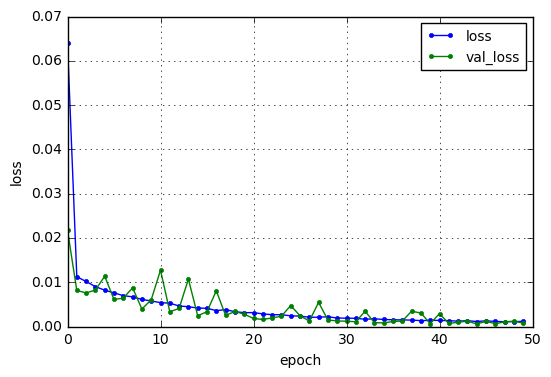

 26%|██▌       | 1082/4209 [00:00<00:00, 10810.27it/s]

AccX is registed now
Build Complete
Source shape is(1077870,)
window frames num =8418
offset=808238.0


100%|██████████| 4209/4209 [00:02<00:00, 1767.70it/s]


hiden node = 16
_dim=0016_Win=0256_Sld=0064_SGD
Train on 4210 samples, validate on 4210 samples
Epoch 1/50
0s - loss: 0.7624 - val_loss: 0.6781
Epoch 2/50
0s - loss: 0.6095 - val_loss: 0.5396
Epoch 3/50
0s - loss: 0.4749 - val_loss: 0.4125
Epoch 4/50
0s - loss: 0.3598 - val_loss: 0.3105
Epoch 5/50
0s - loss: 0.2706 - val_loss: 0.2337
Epoch 6/50
0s - loss: 0.2042 - val_loss: 0.1771
Epoch 7/50
0s - loss: 0.1556 - val_loss: 0.1358
Epoch 8/50
0s - loss: 0.1203 - val_loss: 0.1060
Epoch 9/50
0s - loss: 0.0948 - val_loss: 0.0845
Epoch 10/50
0s - loss: 0.0764 - val_loss: 0.0691
Epoch 11/50
0s - loss: 0.0633 - val_loss: 0.0579
Epoch 12/50
0s - loss: 0.0538 - val_loss: 0.0499
Epoch 13/50
0s - loss: 0.0469 - val_loss: 0.0441
Epoch 14/50
0s - loss: 0.0419 - val_loss: 0.0398
Epoch 15/50
0s - loss: 0.0382 - val_loss: 0.0367
Epoch 16/50
0s - loss: 0.0354 - val_loss: 0.0343
Epoch 17/50
0s - loss: 0.0333 - val_loss: 0.0324
Epoch 18/50
0s - loss: 0.0317 - val_loss: 0.0309
Epoch 19/50
0s - loss: 0.0303 -

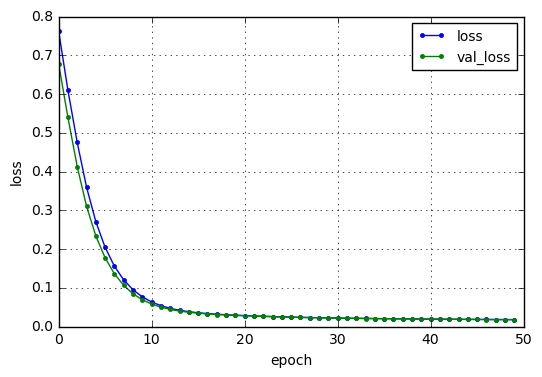

hiden node = 16
_dim=0016_Win=0256_Sld=0064_Adadelta
Train on 4210 samples, validate on 4210 samples
Epoch 1/50
0s - loss: 0.3144 - val_loss: 0.0535
Epoch 2/50
0s - loss: 0.0299 - val_loss: 0.0193
Epoch 3/50
0s - loss: 0.0169 - val_loss: 0.0146
Epoch 4/50
0s - loss: 0.0151 - val_loss: 0.0194
Epoch 5/50
0s - loss: 0.0145 - val_loss: 0.0162
Epoch 6/50
0s - loss: 0.0140 - val_loss: 0.0147
Epoch 7/50
0s - loss: 0.0140 - val_loss: 0.0140
Epoch 8/50
0s - loss: 0.0131 - val_loss: 0.0150
Epoch 9/50
0s - loss: 0.0129 - val_loss: 0.0108
Epoch 10/50
0s - loss: 0.0124 - val_loss: 0.0104
Epoch 11/50
0s - loss: 0.0116 - val_loss: 0.0139
Epoch 12/50
0s - loss: 0.0118 - val_loss: 0.0100
Epoch 13/50
0s - loss: 0.0107 - val_loss: 0.0127
Epoch 14/50
0s - loss: 0.0114 - val_loss: 0.0103
Epoch 15/50
0s - loss: 0.0107 - val_loss: 0.0125
Epoch 16/50
0s - loss: 0.0104 - val_loss: 0.0154
Epoch 17/50
0s - loss: 0.0104 - val_loss: 0.0085
Epoch 18/50
0s - loss: 0.0093 - val_loss: 0.0101
Epoch 19/50
0s - loss: 0.0

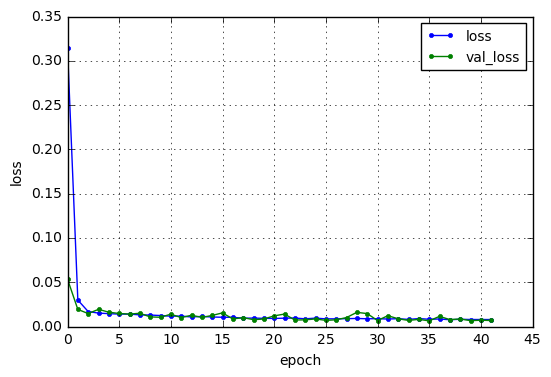

hiden node = 16
_dim=0016_Win=0256_Sld=0064_Adamax
Train on 4210 samples, validate on 4210 samples
Epoch 1/50
0s - loss: 0.1292 - val_loss: 0.0189
Epoch 2/50
0s - loss: 0.0166 - val_loss: 0.0151
Epoch 3/50
0s - loss: 0.0140 - val_loss: 0.0131
Epoch 4/50
0s - loss: 0.0127 - val_loss: 0.0122
Epoch 5/50
0s - loss: 0.0119 - val_loss: 0.0116
Epoch 6/50
0s - loss: 0.0112 - val_loss: 0.0110
Epoch 7/50
0s - loss: 0.0107 - val_loss: 0.0109
Epoch 8/50
0s - loss: 0.0102 - val_loss: 0.0106
Epoch 9/50
0s - loss: 0.0096 - val_loss: 0.0090
Epoch 10/50
0s - loss: 0.0088 - val_loss: 0.0084
Epoch 11/50
0s - loss: 0.0084 - val_loss: 0.0095
Epoch 12/50
0s - loss: 0.0077 - val_loss: 0.0071
Epoch 13/50
0s - loss: 0.0071 - val_loss: 0.0069
Epoch 14/50
0s - loss: 0.0066 - val_loss: 0.0062
Epoch 15/50
0s - loss: 0.0062 - val_loss: 0.0062
Epoch 16/50
0s - loss: 0.0059 - val_loss: 0.0055
Epoch 17/50
0s - loss: 0.0055 - val_loss: 0.0051
Epoch 18/50
0s - loss: 0.0052 - val_loss: 0.0049
Epoch 19/50
0s - loss: 0.004

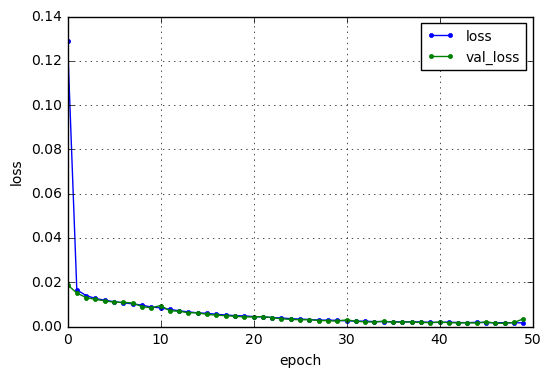

hiden node = 16
_dim=0016_Win=0256_Sld=0064_Adam
Train on 4210 samples, validate on 4210 samples
Epoch 1/50
0s - loss: 0.1956 - val_loss: 0.0211
Epoch 2/50
0s - loss: 0.0166 - val_loss: 0.0141
Epoch 3/50
0s - loss: 0.0133 - val_loss: 0.0122
Epoch 4/50
0s - loss: 0.0120 - val_loss: 0.0115
Epoch 5/50
0s - loss: 0.0109 - val_loss: 0.0102
Epoch 6/50
0s - loss: 0.0103 - val_loss: 0.0132
Epoch 7/50
0s - loss: 0.0095 - val_loss: 0.0086
Epoch 8/50
0s - loss: 0.0086 - val_loss: 0.0081
Epoch 9/50
0s - loss: 0.0080 - val_loss: 0.0074
Epoch 10/50
0s - loss: 0.0073 - val_loss: 0.0068
Epoch 11/50
0s - loss: 0.0068 - val_loss: 0.0066
Epoch 12/50
0s - loss: 0.0064 - val_loss: 0.0059
Epoch 13/50
0s - loss: 0.0063 - val_loss: 0.0056
Epoch 14/50
0s - loss: 0.0058 - val_loss: 0.0059
Epoch 15/50
0s - loss: 0.0053 - val_loss: 0.0054
Epoch 16/50
0s - loss: 0.0054 - val_loss: 0.0054
Epoch 17/50
0s - loss: 0.0052 - val_loss: 0.0053
Epoch 18/50
0s - loss: 0.0047 - val_loss: 0.0046
Epoch 19/50
0s - loss: 0.0046 

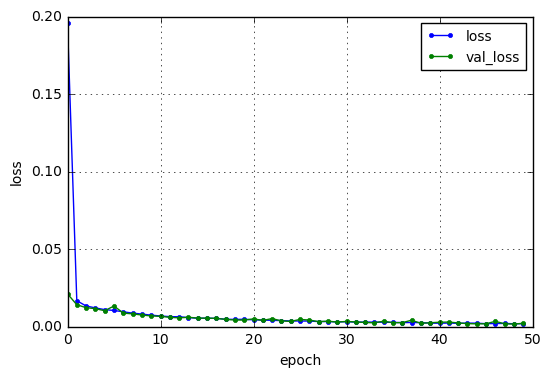

hiden node = 16
_dim=0016_Win=0256_Sld=0064_Adagrad
Train on 4210 samples, validate on 4210 samples
Epoch 1/50
0s - loss: 0.0694 - val_loss: 0.0345
Epoch 2/50
0s - loss: 0.0165 - val_loss: 0.0141
Epoch 3/50
0s - loss: 0.0150 - val_loss: 0.0131
Epoch 4/50
0s - loss: 0.0134 - val_loss: 0.0123
Epoch 5/50
0s - loss: 0.0130 - val_loss: 0.0142
Epoch 6/50
0s - loss: 0.0124 - val_loss: 0.0111
Epoch 7/50
0s - loss: 0.0118 - val_loss: 0.0107
Epoch 8/50
0s - loss: 0.0114 - val_loss: 0.0105
Epoch 9/50
0s - loss: 0.0109 - val_loss: 0.0102
Epoch 10/50
0s - loss: 0.0105 - val_loss: 0.0109
Epoch 11/50
0s - loss: 0.0101 - val_loss: 0.0092
Epoch 12/50
0s - loss: 0.0100 - val_loss: 0.0089
Epoch 13/50
0s - loss: 0.0093 - val_loss: 0.0087
Epoch 14/50
0s - loss: 0.0093 - val_loss: 0.0088
Epoch 15/50
0s - loss: 0.0090 - val_loss: 0.0089
Epoch 16/50
0s - loss: 0.0084 - val_loss: 0.0083
Epoch 17/50
0s - loss: 0.0083 - val_loss: 0.0080
Epoch 18/50
0s - loss: 0.0083 - val_loss: 0.0081
Epoch 19/50
0s - loss: 0.00

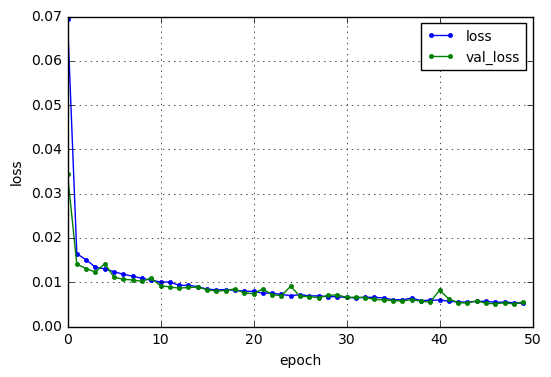

hiden node = 16
_dim=0016_Win=0256_Sld=0064_RMSprop
Train on 4210 samples, validate on 4210 samples
Epoch 1/50
0s - loss: 0.1420 - val_loss: 0.0172
Epoch 2/50
0s - loss: 0.0168 - val_loss: 0.0220
Epoch 3/50
0s - loss: 0.0161 - val_loss: 0.0126
Epoch 4/50
0s - loss: 0.0155 - val_loss: 0.0168
Epoch 5/50
0s - loss: 0.0148 - val_loss: 0.0146
Epoch 6/50
0s - loss: 0.0141 - val_loss: 0.0113
Epoch 7/50
0s - loss: 0.0135 - val_loss: 0.0198
Epoch 8/50
0s - loss: 0.0133 - val_loss: 0.0096
Epoch 9/50
0s - loss: 0.0128 - val_loss: 0.0093
Epoch 10/50
0s - loss: 0.0128 - val_loss: 0.0101
Epoch 11/50
0s - loss: 0.0123 - val_loss: 0.0108
Epoch 12/50
0s - loss: 0.0121 - val_loss: 0.0089
Epoch 13/50
0s - loss: 0.0121 - val_loss: 0.0125
Epoch 14/50
0s - loss: 0.0118 - val_loss: 0.0098
Epoch 15/50
0s - loss: 0.0112 - val_loss: 0.0154
Epoch 16/50
0s - loss: 0.0115 - val_loss: 0.0081
Epoch 17/50
0s - loss: 0.0112 - val_loss: 0.0139
Epoch 18/50
0s - loss: 0.0112 - val_loss: 0.0151
Epoch 19/50
0s - loss: 0.01

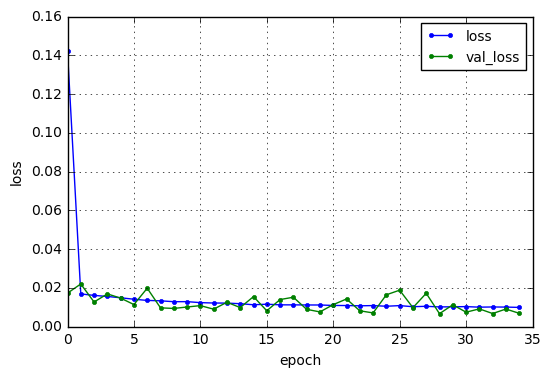

hiden node = 16
_dim=0016_Win=0256_Sld=0064_Nadam
Train on 4210 samples, validate on 4210 samples
Epoch 1/50
0s - loss: 0.1214 - val_loss: 0.0171
Epoch 2/50
0s - loss: 0.0192 - val_loss: 0.0167
Epoch 3/50
0s - loss: 0.0181 - val_loss: 0.0151
Epoch 4/50
0s - loss: 0.0170 - val_loss: 0.0183
Epoch 5/50
0s - loss: 0.0161 - val_loss: 0.0134
Epoch 6/50
0s - loss: 0.0157 - val_loss: 0.0157
Epoch 7/50
0s - loss: 0.0143 - val_loss: 0.0203
Epoch 8/50
0s - loss: 0.0139 - val_loss: 0.0103
Epoch 9/50
0s - loss: 0.0138 - val_loss: 0.0100
Epoch 10/50
0s - loss: 0.0130 - val_loss: 0.0132
Epoch 11/50
0s - loss: 0.0124 - val_loss: 0.0125
Epoch 12/50
0s - loss: 0.0124 - val_loss: 0.0443
Epoch 13/50
0s - loss: 0.0117 - val_loss: 0.0124
Epoch 14/50
0s - loss: 0.0113 - val_loss: 0.0132
Epoch 15/50
0s - loss: 0.0111 - val_loss: 0.0075
Epoch 16/50
0s - loss: 0.0108 - val_loss: 0.0170
Epoch 17/50
0s - loss: 0.0100 - val_loss: 0.0339
Epoch 18/50
0s - loss: 0.0100 - val_loss: 0.0070
Epoch 19/50
0s - loss: 0.0101

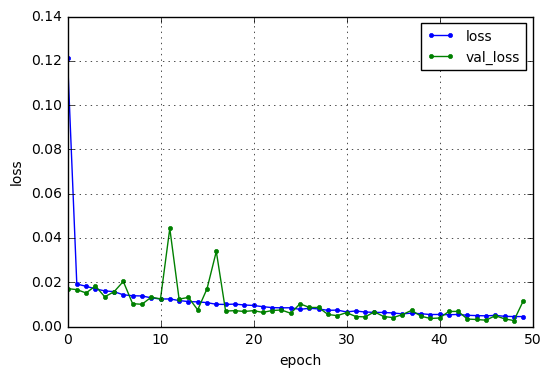

 38%|███▊      | 790/2104 [00:00<00:00, 7897.24it/s]

AccX is registed now
Build Complete
Source shape is(1077870,)
window frames num =4208
offset=808046.0


100%|██████████| 2104/2104 [00:01<00:00, 1872.08it/s]


hiden node = 16
_dim=0016_Win=0512_Sld=0128_SGD
Train on 2105 samples, validate on 2105 samples
Epoch 1/50
0s - loss: 0.8209 - val_loss: 0.7940
Epoch 2/50
0s - loss: 0.7739 - val_loss: 0.7546
Epoch 3/50
0s - loss: 0.7368 - val_loss: 0.7182
Epoch 4/50
0s - loss: 0.7002 - val_loss: 0.6816
Epoch 5/50
0s - loss: 0.6637 - val_loss: 0.6451
Epoch 6/50
0s - loss: 0.6274 - val_loss: 0.6090
Epoch 7/50
0s - loss: 0.5916 - val_loss: 0.5736
Epoch 8/50
0s - loss: 0.5565 - val_loss: 0.5390
Epoch 9/50
0s - loss: 0.5226 - val_loss: 0.5057
Epoch 10/50
0s - loss: 0.4899 - val_loss: 0.4737
Epoch 11/50
0s - loss: 0.4587 - val_loss: 0.4433
Epoch 12/50
0s - loss: 0.4290 - val_loss: 0.4145
Epoch 13/50
0s - loss: 0.4011 - val_loss: 0.3874
Epoch 14/50
0s - loss: 0.3748 - val_loss: 0.3620
Epoch 15/50
0s - loss: 0.3502 - val_loss: 0.3383
Epoch 16/50
0s - loss: 0.3273 - val_loss: 0.3162
Epoch 17/50
0s - loss: 0.3059 - val_loss: 0.2956
Epoch 18/50
0s - loss: 0.2860 - val_loss: 0.2763
Epoch 19/50
0s - loss: 0.2674 -

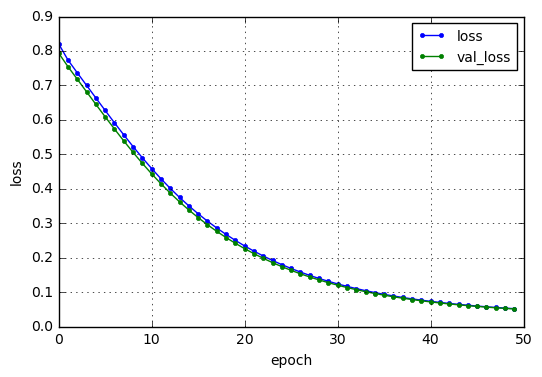

hiden node = 16
_dim=0016_Win=0512_Sld=0128_Adadelta
Train on 2105 samples, validate on 2105 samples
Epoch 1/50
0s - loss: 0.5108 - val_loss: 0.2087
Epoch 2/50
0s - loss: 0.1122 - val_loss: 0.0567
Epoch 3/50
0s - loss: 0.0401 - val_loss: 0.0300
Epoch 4/50
0s - loss: 0.0258 - val_loss: 0.0228
Epoch 5/50
0s - loss: 0.0225 - val_loss: 0.0208
Epoch 6/50
0s - loss: 0.0211 - val_loss: 0.0203
Epoch 7/50
0s - loss: 0.0203 - val_loss: 0.0186
Epoch 8/50
0s - loss: 0.0199 - val_loss: 0.0183
Epoch 9/50
0s - loss: 0.0193 - val_loss: 0.0180
Epoch 10/50
0s - loss: 0.0195 - val_loss: 0.0176
Epoch 11/50
0s - loss: 0.0191 - val_loss: 0.0188
Epoch 12/50
0s - loss: 0.0191 - val_loss: 0.0182
Epoch 13/50
0s - loss: 0.0194 - val_loss: 0.0170
Epoch 14/50
0s - loss: 0.0187 - val_loss: 0.0167
Epoch 15/50
0s - loss: 0.0188 - val_loss: 0.0278
Epoch 16/50
0s - loss: 0.0183 - val_loss: 0.0163
Epoch 17/50
0s - loss: 0.0177 - val_loss: 0.0161
Epoch 18/50
0s - loss: 0.0175 - val_loss: 0.0166
Epoch 19/50
0s - loss: 0.0

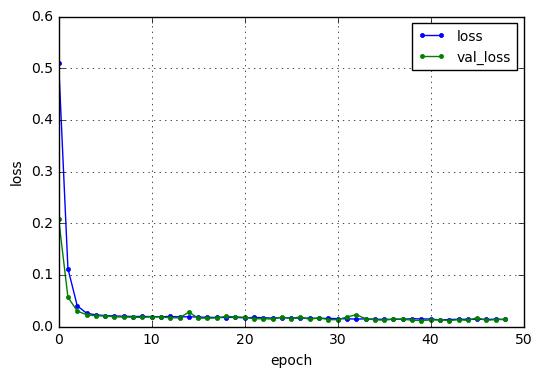

hiden node = 16
_dim=0016_Win=0512_Sld=0128_Adamax
Train on 2105 samples, validate on 2105 samples
Epoch 1/50
0s - loss: 0.2300 - val_loss: 0.0333
Epoch 2/50
0s - loss: 0.0265 - val_loss: 0.0227
Epoch 3/50
0s - loss: 0.0213 - val_loss: 0.0200
Epoch 4/50
0s - loss: 0.0199 - val_loss: 0.0201
Epoch 5/50
0s - loss: 0.0188 - val_loss: 0.0180
Epoch 6/50
0s - loss: 0.0179 - val_loss: 0.0182
Epoch 7/50
0s - loss: 0.0176 - val_loss: 0.0169
Epoch 8/50
0s - loss: 0.0171 - val_loss: 0.0165
Epoch 9/50
0s - loss: 0.0165 - val_loss: 0.0161
Epoch 10/50
0s - loss: 0.0162 - val_loss: 0.0159
Epoch 11/50
0s - loss: 0.0160 - val_loss: 0.0153
Epoch 12/50
0s - loss: 0.0153 - val_loss: 0.0151
Epoch 13/50
0s - loss: 0.0150 - val_loss: 0.0145
Epoch 14/50
0s - loss: 0.0149 - val_loss: 0.0161
Epoch 15/50
0s - loss: 0.0145 - val_loss: 0.0143
Epoch 16/50
0s - loss: 0.0137 - val_loss: 0.0131
Epoch 17/50
0s - loss: 0.0130 - val_loss: 0.0124
Epoch 18/50
0s - loss: 0.0126 - val_loss: 0.0124
Epoch 19/50
0s - loss: 0.012

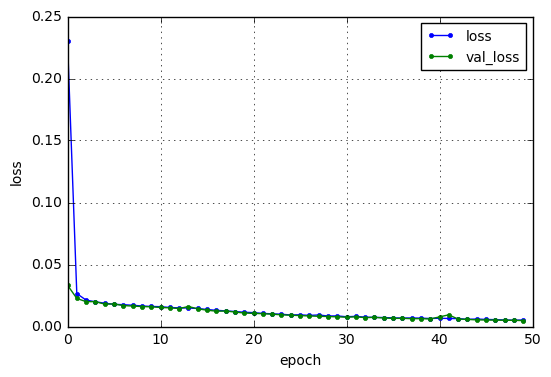

hiden node = 16
_dim=0016_Win=0512_Sld=0128_Adam
Train on 2105 samples, validate on 2105 samples
Epoch 1/50
0s - loss: 0.3369 - val_loss: 0.0557
Epoch 2/50
0s - loss: 0.0325 - val_loss: 0.0233
Epoch 3/50
0s - loss: 0.0223 - val_loss: 0.0215
Epoch 4/50
0s - loss: 0.0194 - val_loss: 0.0187
Epoch 5/50
0s - loss: 0.0181 - val_loss: 0.0173
Epoch 6/50
0s - loss: 0.0171 - val_loss: 0.0166
Epoch 7/50
0s - loss: 0.0167 - val_loss: 0.0174
Epoch 8/50
0s - loss: 0.0165 - val_loss: 0.0166
Epoch 9/50
0s - loss: 0.0156 - val_loss: 0.0149
Epoch 10/50
0s - loss: 0.0151 - val_loss: 0.0140
Epoch 11/50
0s - loss: 0.0141 - val_loss: 0.0133
Epoch 12/50
0s - loss: 0.0134 - val_loss: 0.0137
Epoch 13/50
0s - loss: 0.0136 - val_loss: 0.0185
Epoch 14/50
0s - loss: 0.0127 - val_loss: 0.0119
Epoch 15/50
0s - loss: 0.0116 - val_loss: 0.0112
Epoch 16/50
0s - loss: 0.0109 - val_loss: 0.0106
Epoch 17/50
0s - loss: 0.0106 - val_loss: 0.0111
Epoch 18/50
0s - loss: 0.0118 - val_loss: 0.0115
Epoch 19/50
0s - loss: 0.0100 

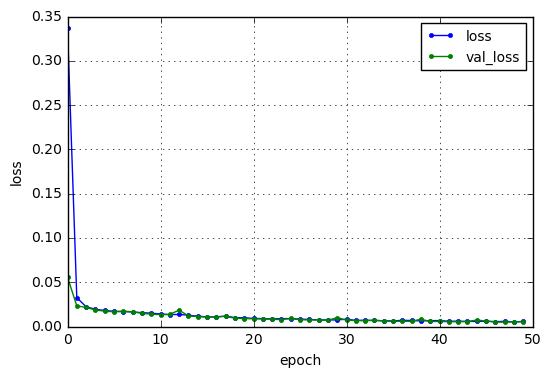

hiden node = 16
_dim=0016_Win=0512_Sld=0128_Adagrad
Train on 2105 samples, validate on 2105 samples
Epoch 1/50
0s - loss: 0.1198 - val_loss: 0.0543
Epoch 2/50
0s - loss: 0.0293 - val_loss: 0.0286
Epoch 3/50
0s - loss: 0.0234 - val_loss: 0.0205
Epoch 4/50
0s - loss: 0.0220 - val_loss: 0.0206
Epoch 5/50
0s - loss: 0.0219 - val_loss: 0.0191
Epoch 6/50
0s - loss: 0.0203 - val_loss: 0.0192
Epoch 7/50
0s - loss: 0.0205 - val_loss: 0.0192
Epoch 8/50
0s - loss: 0.0198 - val_loss: 0.0209
Epoch 9/50
0s - loss: 0.0197 - val_loss: 0.0174
Epoch 10/50
0s - loss: 0.0187 - val_loss: 0.0184
Epoch 11/50
0s - loss: 0.0191 - val_loss: 0.0167
Epoch 12/50
0s - loss: 0.0183 - val_loss: 0.0171
Epoch 13/50
0s - loss: 0.0180 - val_loss: 0.0174
Epoch 14/50
0s - loss: 0.0176 - val_loss: 0.0200
Epoch 15/50
0s - loss: 0.0178 - val_loss: 0.0157
Epoch 16/50
0s - loss: 0.0167 - val_loss: 0.0152
Epoch 17/50
0s - loss: 0.0168 - val_loss: 0.0150
Epoch 18/50
0s - loss: 0.0162 - val_loss: 0.0312
Epoch 19/50
0s - loss: 0.01

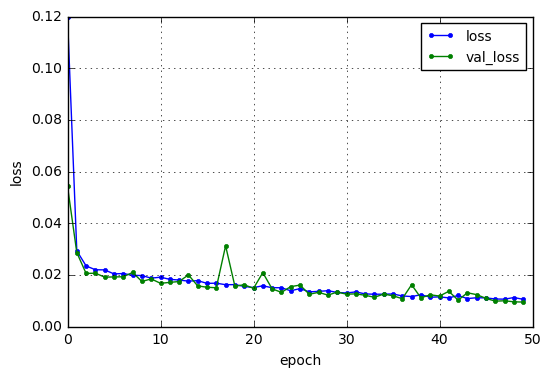

hiden node = 16
_dim=0016_Win=0512_Sld=0128_RMSprop
Train on 2105 samples, validate on 2105 samples
Epoch 1/50
0s - loss: 0.2445 - val_loss: 0.0396
Epoch 2/50
0s - loss: 0.0271 - val_loss: 0.0262
Epoch 3/50
0s - loss: 0.0246 - val_loss: 0.0202
Epoch 4/50
0s - loss: 0.0238 - val_loss: 0.0295
Epoch 5/50
0s - loss: 0.0230 - val_loss: 0.0193
Epoch 6/50
0s - loss: 0.0225 - val_loss: 0.0231
Epoch 7/50
0s - loss: 0.0218 - val_loss: 0.0169
Epoch 8/50
0s - loss: 0.0214 - val_loss: 0.0211
Epoch 9/50
0s - loss: 0.0204 - val_loss: 0.0220
Epoch 10/50
0s - loss: 0.0206 - val_loss: 0.0154
Epoch 11/50
0s - loss: 0.0195 - val_loss: 0.0206
Epoch 12/50
0s - loss: 0.0189 - val_loss: 0.0163
Epoch 13/50
0s - loss: 0.0186 - val_loss: 0.0231
Epoch 14/50
0s - loss: 0.0185 - val_loss: 0.0143
Epoch 15/50
0s - loss: 0.0186 - val_loss: 0.0654
Epoch 16/50
0s - loss: 0.0185 - val_loss: 0.0127
Epoch 17/50
0s - loss: 0.0188 - val_loss: 0.0136
Epoch 18/50
0s - loss: 0.0180 - val_loss: 0.0221
Epoch 19/50
0s - loss: 0.01

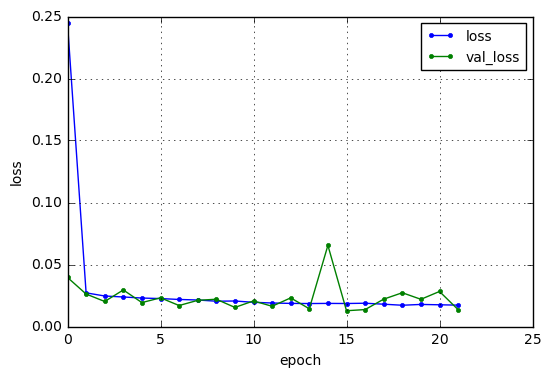

hiden node = 16
_dim=0016_Win=0512_Sld=0128_Nadam
Train on 2105 samples, validate on 2105 samples
Epoch 1/50
0s - loss: 0.2176 - val_loss: 0.0298
Epoch 2/50
0s - loss: 0.0323 - val_loss: 0.0311
Epoch 3/50
0s - loss: 0.0289 - val_loss: 0.0286
Epoch 4/50
0s - loss: 0.0291 - val_loss: 0.0334
Epoch 5/50
0s - loss: 0.0322 - val_loss: 0.0394
Epoch 6/50
0s - loss: 0.0376 - val_loss: 0.0388
Epoch 7/50
0s - loss: 0.0373 - val_loss: 0.0381
Epoch 8/50
0s - loss: 0.0319 - val_loss: 0.0364
Epoch 9/50
0s - loss: 0.0268 - val_loss: 0.0332
  32/2105 [..............................] - ETA: 0s

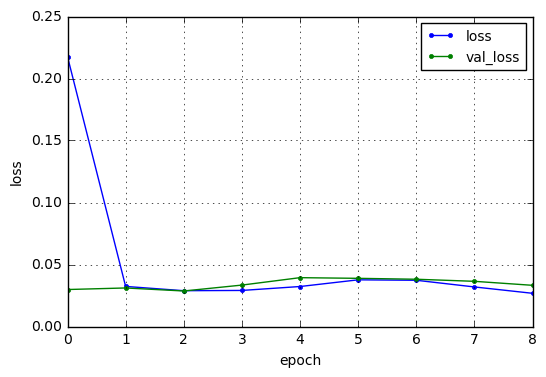

 51%|█████     | 538/1051 [00:00<00:00, 5372.37it/s]

AccX is registed now
Build Complete
Source shape is(1077870,)
window frames num =2103
offset=807662.0


100%|██████████| 1051/1051 [00:00<00:00, 1695.94it/s]


hiden node = 16
_dim=0016_Win=1024_Sld=0256_SGD
Train on 1052 samples, validate on 1052 samples
Epoch 1/50
0s - loss: 0.8485 - val_loss: 0.8415
Epoch 2/50
0s - loss: 0.8355 - val_loss: 0.8292
Epoch 3/50
0s - loss: 0.8239 - val_loss: 0.8186
Epoch 4/50
0s - loss: 0.8139 - val_loss: 0.8088
Epoch 5/50
0s - loss: 0.8039 - val_loss: 0.7986
Epoch 6/50
0s - loss: 0.7935 - val_loss: 0.7879
Epoch 7/50
0s - loss: 0.7826 - val_loss: 0.7768
Epoch 8/50
0s - loss: 0.7713 - val_loss: 0.7653
Epoch 9/50
0s - loss: 0.7597 - val_loss: 0.7536
Epoch 10/50
0s - loss: 0.7478 - val_loss: 0.7416
Epoch 11/50
0s - loss: 0.7358 - val_loss: 0.7295
Epoch 12/50
0s - loss: 0.7236 - val_loss: 0.7173
Epoch 13/50
0s - loss: 0.7114 - val_loss: 0.7051
Epoch 14/50
0s - loss: 0.6993 - val_loss: 0.6930
Epoch 15/50
0s - loss: 0.6871 - val_loss: 0.6809
Epoch 16/50
0s - loss: 0.6751 - val_loss: 0.6689
Epoch 17/50
0s - loss: 0.6632 - val_loss: 0.6571
Epoch 18/50
0s - loss: 0.6514 - val_loss: 0.6453
Epoch 19/50
0s - loss: 0.6397 -

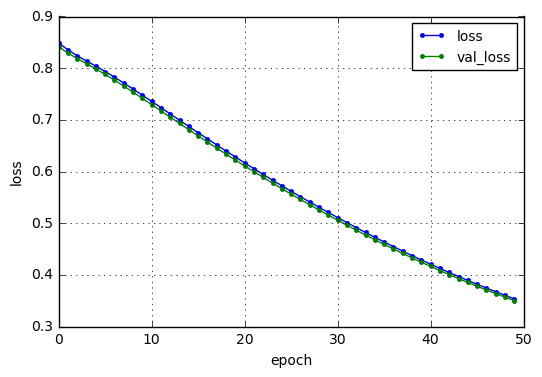

hiden node = 16
_dim=0016_Win=1024_Sld=0256_Adadelta
Train on 1052 samples, validate on 1052 samples
Epoch 1/50
0s - loss: 0.6715 - val_loss: 0.4650
Epoch 2/50
0s - loss: 0.3357 - val_loss: 0.2284
Epoch 3/50
0s - loss: 0.1686 - val_loss: 0.1192
Epoch 4/50
0s - loss: 0.0920 - val_loss: 0.0694
Epoch 5/50
0s - loss: 0.0569 - val_loss: 0.0467
Epoch 6/50
0s - loss: 0.0406 - val_loss: 0.0357
Epoch 7/50
0s - loss: 0.0330 - val_loss: 0.0304
Epoch 8/50
0s - loss: 0.0294 - val_loss: 0.0291
Epoch 9/50
0s - loss: 0.0278 - val_loss: 0.0264
Epoch 10/50
0s - loss: 0.0273 - val_loss: 0.0263
Epoch 11/50
0s - loss: 0.0258 - val_loss: 0.0255
Epoch 12/50
0s - loss: 0.0252 - val_loss: 0.0268
Epoch 13/50
0s - loss: 0.0251 - val_loss: 0.0241
Epoch 14/50
0s - loss: 0.0253 - val_loss: 0.0262
Epoch 15/50
0s - loss: 0.0258 - val_loss: 0.0239
Epoch 16/50
0s - loss: 0.0260 - val_loss: 0.0237
Epoch 17/50
0s - loss: 0.0258 - val_loss: 0.0236
Epoch 18/50
0s - loss: 0.0244 - val_loss: 0.0231
Epoch 19/50
0s - loss: 0.0

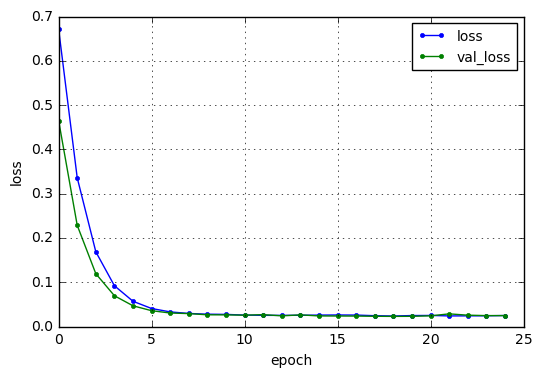

hiden node = 16
_dim=0016_Win=1024_Sld=0256_Adamax
Train on 1052 samples, validate on 1052 samples
Epoch 1/50
0s - loss: 0.4100 - val_loss: 0.1001
Epoch 2/50
0s - loss: 0.0539 - val_loss: 0.0348
Epoch 3/50
0s - loss: 0.0323 - val_loss: 0.0288
Epoch 4/50
0s - loss: 0.0274 - val_loss: 0.0261
Epoch 5/50
0s - loss: 0.0254 - val_loss: 0.0247
Epoch 6/50
0s - loss: 0.0246 - val_loss: 0.0240
Epoch 7/50
0s - loss: 0.0239 - val_loss: 0.0236
Epoch 8/50
0s - loss: 0.0233 - val_loss: 0.0228
Epoch 9/50
0s - loss: 0.0229 - val_loss: 0.0225
Epoch 10/50
0s - loss: 0.0226 - val_loss: 0.0220
Epoch 11/50
0s - loss: 0.0224 - val_loss: 0.0221
Epoch 12/50
0s - loss: 0.0218 - val_loss: 0.0218
Epoch 13/50
0s - loss: 0.0221 - val_loss: 0.0213
Epoch 14/50
0s - loss: 0.0216 - val_loss: 0.0211
Epoch 15/50
0s - loss: 0.0210 - val_loss: 0.0207
Epoch 16/50
0s - loss: 0.0207 - val_loss: 0.0204
Epoch 17/50
0s - loss: 0.0203 - val_loss: 0.0200
Epoch 18/50
0s - loss: 0.0203 - val_loss: 0.0198
Epoch 19/50
0s - loss: 0.020

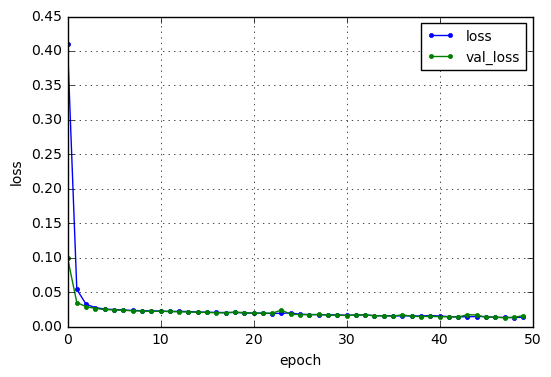

hiden node = 16
_dim=0016_Win=1024_Sld=0256_Adam
Train on 1052 samples, validate on 1052 samples
Epoch 1/50
0s - loss: 0.5256 - val_loss: 0.2234
Epoch 2/50
0s - loss: 0.1155 - val_loss: 0.0555
Epoch 3/50
0s - loss: 0.0398 - val_loss: 0.0312
Epoch 4/50
0s - loss: 0.0295 - val_loss: 0.0272
Epoch 5/50
0s - loss: 0.0269 - val_loss: 0.0258
Epoch 6/50
0s - loss: 0.0258 - val_loss: 0.0246
Epoch 7/50
0s - loss: 0.0254 - val_loss: 0.0252
Epoch 8/50
0s - loss: 0.0250 - val_loss: 0.0247
Epoch 9/50
0s - loss: 0.0244 - val_loss: 0.0242
Epoch 10/50
0s - loss: 0.0234 - val_loss: 0.0237
Epoch 11/50
0s - loss: 0.0225 - val_loss: 0.0217
Epoch 12/50
0s - loss: 0.0217 - val_loss: 0.0215
Epoch 13/50
0s - loss: 0.0235 - val_loss: 0.0270
Epoch 14/50
0s - loss: 0.0223 - val_loss: 0.0207
Epoch 15/50
0s - loss: 0.0210 - val_loss: 0.0205
Epoch 16/50
0s - loss: 0.0202 - val_loss: 0.0203
Epoch 17/50
0s - loss: 0.0211 - val_loss: 0.0200
Epoch 18/50
0s - loss: 0.0200 - val_loss: 0.0193
Epoch 19/50
0s - loss: 0.0205 

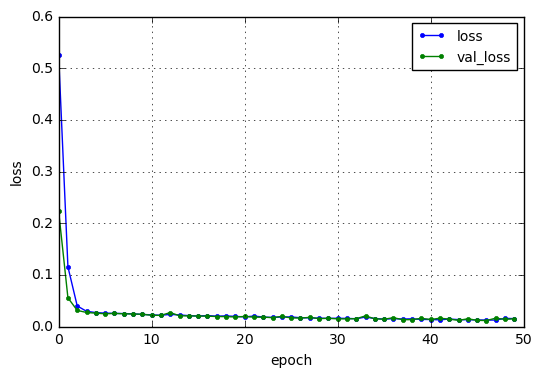

hiden node = 16
_dim=0016_Win=1024_Sld=0256_Adagrad
Train on 1052 samples, validate on 1052 samples
Epoch 1/50
0s - loss: 0.2517 - val_loss: 0.0541
Epoch 2/50
0s - loss: 0.0454 - val_loss: 0.0428
Epoch 3/50
0s - loss: 0.0415 - val_loss: 0.0379
Epoch 4/50
0s - loss: 0.0384 - val_loss: 0.0347
Epoch 5/50
0s - loss: 0.0372 - val_loss: 0.0337
Epoch 6/50
0s - loss: 0.0352 - val_loss: 0.0340
Epoch 7/50
0s - loss: 0.0330 - val_loss: 0.0316
Epoch 8/50
0s - loss: 0.0305 - val_loss: 0.0286
Epoch 9/50
0s - loss: 0.0330 - val_loss: 0.0365
Epoch 10/50
0s - loss: 0.0321 - val_loss: 0.0289
Epoch 11/50
0s - loss: 0.0282 - val_loss: 0.0286
Epoch 12/50
0s - loss: 0.0281 - val_loss: 0.0274
Epoch 13/50
0s - loss: 0.0263 - val_loss: 0.0267
Epoch 14/50
0s - loss: 0.0257 - val_loss: 0.0250
Epoch 15/50
0s - loss: 0.0251 - val_loss: 0.0243
Epoch 16/50
0s - loss: 0.0253 - val_loss: 0.0255
Epoch 17/50
0s - loss: 0.0278 - val_loss: 0.0336
Epoch 18/50
0s - loss: 0.0248 - val_loss: 0.0265
Epoch 19/50
0s - loss: 0.02

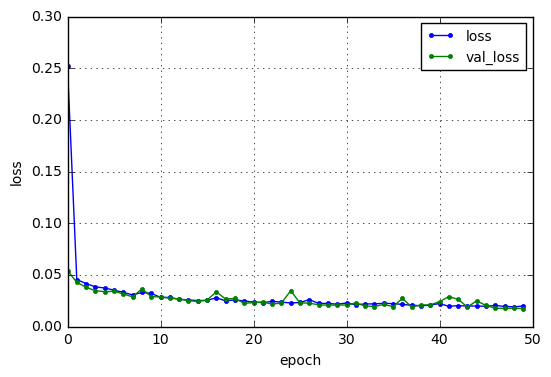

hiden node = 16
_dim=0016_Win=1024_Sld=0256_RMSprop
Train on 1052 samples, validate on 1052 samples
Epoch 1/50
0s - loss: 0.4189 - val_loss: 0.1605
Epoch 2/50
0s - loss: 0.0832 - val_loss: 0.0400
Epoch 3/50
0s - loss: 0.0353 - val_loss: 0.0298
Epoch 4/50
0s - loss: 0.0345 - val_loss: 0.0283
Epoch 5/50
0s - loss: 0.0288 - val_loss: 0.0384
Epoch 6/50
0s - loss: 0.0336 - val_loss: 0.0276
Epoch 7/50
0s - loss: 0.0323 - val_loss: 0.0255
Epoch 8/50
0s - loss: 0.0290 - val_loss: 0.0249
Epoch 9/50
0s - loss: 0.0293 - val_loss: 0.0264
Epoch 10/50
0s - loss: 0.0309 - val_loss: 0.0268
Epoch 11/50
0s - loss: 0.0285 - val_loss: 0.0249
Epoch 12/50
0s - loss: 0.0298 - val_loss: 0.0276
Epoch 13/50
0s - loss: 0.0290 - val_loss: 0.0261
Epoch 14/50
0s - loss: 0.0324 - val_loss: 0.0228
Epoch 15/50
0s - loss: 0.0286 - val_loss: 0.0241
Epoch 16/50
0s - loss: 0.0260 - val_loss: 0.0235
Epoch 17/50
0s - loss: 0.0274 - val_loss: 0.0312
Epoch 18/50
0s - loss: 0.0273 - val_loss: 0.0236
Epoch 19/50
0s - loss: 0.02

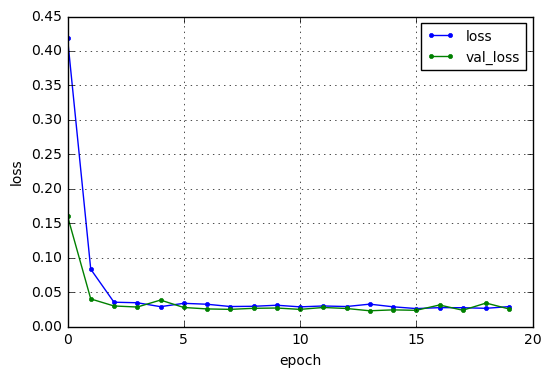

hiden node = 16
_dim=0016_Win=1024_Sld=0256_Nadam
Train on 1052 samples, validate on 1052 samples
Epoch 1/50
0s - loss: 0.3898 - val_loss: 0.0760
Epoch 2/50
0s - loss: 0.0477 - val_loss: 0.0417
Epoch 3/50
0s - loss: 0.0464 - val_loss: 0.0438
Epoch 4/50
0s - loss: 0.0465 - val_loss: 0.0451
Epoch 5/50
0s - loss: 0.0446 - val_loss: 0.0419
Epoch 6/50
0s - loss: 0.0421 - val_loss: 0.0419
Epoch 7/50
0s - loss: 0.0419 - val_loss: 0.0404
Epoch 8/50
0s - loss: 0.0408 - val_loss: 0.0389
Epoch 9/50
0s - loss: 0.0418 - val_loss: 0.0415
Epoch 10/50
0s - loss: 0.0402 - val_loss: 0.0384
Epoch 11/50
0s - loss: 0.0406 - val_loss: 0.0384
Epoch 12/50
0s - loss: 0.0383 - val_loss: 0.0366
Epoch 13/50
0s - loss: 0.0370 - val_loss: 0.0365
Epoch 14/50
0s - loss: 0.0357 - val_loss: 0.0351
Epoch 15/50
0s - loss: 0.0356 - val_loss: 0.0332
Epoch 16/50
0s - loss: 0.0338 - val_loss: 0.0331
Epoch 17/50
0s - loss: 0.0347 - val_loss: 0.0318
Epoch 18/50
0s - loss: 0.0356 - val_loss: 0.0323
Epoch 19/50
0s - loss: 0.0342

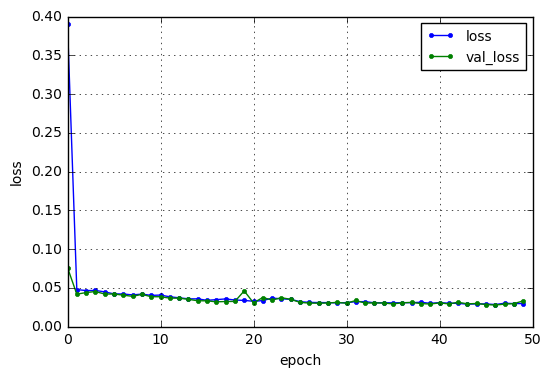

 66%|██████▌   | 344/525 [00:00<00:00, 3431.14it/s]

AccX is registed now
Build Complete
Source shape is(1077870,)
window frames num =1050
offset=807022.0


100%|██████████| 525/525 [00:00<00:00, 1751.68it/s]


hiden node = 16
_dim=0016_Win=2048_Sld=0512_SGD
Train on 526 samples, validate on 526 samples
Epoch 1/50
0s - loss: 0.8574 - val_loss: 0.8549
Epoch 2/50
0s - loss: 0.8529 - val_loss: 0.8505
Epoch 3/50
0s - loss: 0.8489 - val_loss: 0.8470
Epoch 4/50
0s - loss: 0.8457 - val_loss: 0.8442
Epoch 5/50
0s - loss: 0.8430 - val_loss: 0.8415
Epoch 6/50
0s - loss: 0.8403 - val_loss: 0.8388
Epoch 7/50
0s - loss: 0.8376 - val_loss: 0.8361
Epoch 8/50
0s - loss: 0.8348 - val_loss: 0.8333
Epoch 9/50
0s - loss: 0.8320 - val_loss: 0.8304
Epoch 10/50
0s - loss: 0.8291 - val_loss: 0.8275
Epoch 11/50
0s - loss: 0.8261 - val_loss: 0.8244
Epoch 12/50
0s - loss: 0.8230 - val_loss: 0.8213
Epoch 13/50
0s - loss: 0.8199 - val_loss: 0.8182
Epoch 14/50
0s - loss: 0.8167 - val_loss: 0.8149
Epoch 15/50
0s - loss: 0.8134 - val_loss: 0.8116
Epoch 16/50
0s - loss: 0.8101 - val_loss: 0.8083
Epoch 17/50
0s - loss: 0.8067 - val_loss: 0.8049
Epoch 18/50
0s - loss: 0.8033 - val_loss: 0.8014
Epoch 19/50
0s - loss: 0.7998 - v

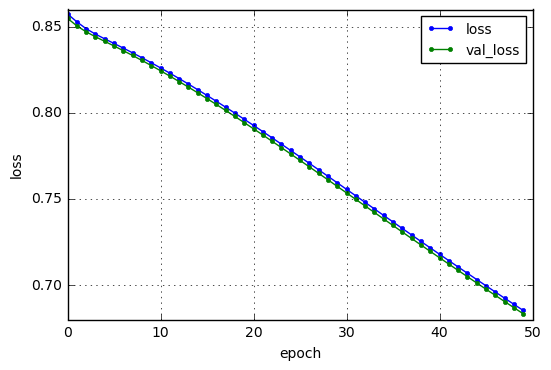

hiden node = 16
_dim=0016_Win=2048_Sld=0512_Adadelta
Train on 526 samples, validate on 526 samples
Epoch 1/50
0s - loss: 0.7626 - val_loss: 0.6552
Epoch 2/50
0s - loss: 0.5761 - val_loss: 0.4895
Epoch 3/50
0s - loss: 0.4304 - val_loss: 0.3661
Epoch 4/50
0s - loss: 0.3223 - val_loss: 0.2751
Epoch 5/50
0s - loss: 0.2428 - val_loss: 0.2078
Epoch 6/50
0s - loss: 0.1841 - val_loss: 0.1586
Epoch 7/50
0s - loss: 0.1413 - val_loss: 0.1225
Epoch 8/50
0s - loss: 0.1099 - val_loss: 0.0963
Epoch 9/50
0s - loss: 0.0871 - val_loss: 0.0772
Epoch 10/50
0s - loss: 0.0707 - val_loss: 0.0636
Epoch 11/50
0s - loss: 0.0589 - val_loss: 0.0540
Epoch 12/50
0s - loss: 0.0506 - val_loss: 0.0470
Epoch 13/50
0s - loss: 0.0446 - val_loss: 0.0422
Epoch 14/50
0s - loss: 0.0404 - val_loss: 0.0390
Epoch 15/50
0s - loss: 0.0377 - val_loss: 0.0362
Epoch 16/50
0s - loss: 0.0355 - val_loss: 0.0344
Epoch 17/50
0s - loss: 0.0342 - val_loss: 0.0346
Epoch 18/50
0s - loss: 0.0335 - val_loss: 0.0324
Epoch 19/50
0s - loss: 0.032

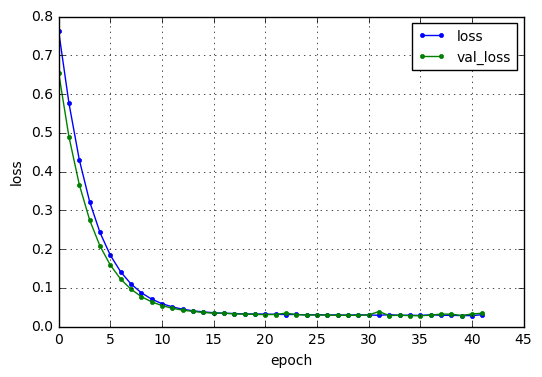

hiden node = 16
_dim=0016_Win=2048_Sld=0512_Adamax
Train on 526 samples, validate on 526 samples
Epoch 1/50
0s - loss: 0.6556 - val_loss: 0.3633
Epoch 2/50
0s - loss: 0.2231 - val_loss: 0.1129
Epoch 3/50
0s - loss: 0.0779 - val_loss: 0.0521
Epoch 4/50
0s - loss: 0.0453 - val_loss: 0.0395
Epoch 5/50
0s - loss: 0.0380 - val_loss: 0.0363
Epoch 6/50
0s - loss: 0.0356 - val_loss: 0.0346
Epoch 7/50
0s - loss: 0.0345 - val_loss: 0.0332
Epoch 8/50
0s - loss: 0.0326 - val_loss: 0.0319
Epoch 9/50
0s - loss: 0.0312 - val_loss: 0.0314
Epoch 10/50
0s - loss: 0.0314 - val_loss: 0.0318
Epoch 11/50
0s - loss: 0.0314 - val_loss: 0.0302
Epoch 12/50
0s - loss: 0.0313 - val_loss: 0.0307
Epoch 13/50
0s - loss: 0.0305 - val_loss: 0.0328
Epoch 14/50
0s - loss: 0.0303 - val_loss: 0.0295
Epoch 15/50
0s - loss: 0.0296 - val_loss: 0.0299
Epoch 16/50
0s - loss: 0.0288 - val_loss: 0.0286
Epoch 17/50
0s - loss: 0.0285 - val_loss: 0.0281
Epoch 18/50
0s - loss: 0.0281 - val_loss: 0.0293
Epoch 19/50
0s - loss: 0.0279 

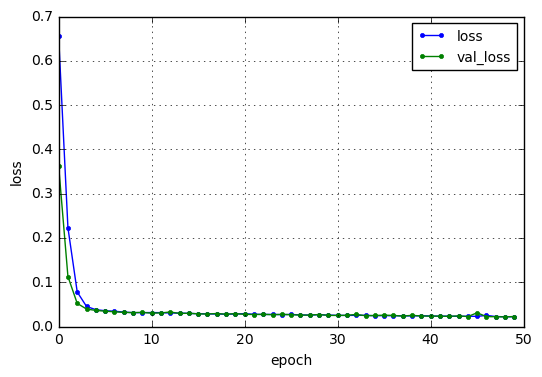

hiden node = 16
_dim=0016_Win=2048_Sld=0512_Adam
Train on 526 samples, validate on 526 samples
Epoch 1/50
0s - loss: 0.7105 - val_loss: 0.5005
Epoch 2/50
0s - loss: 0.3620 - val_loss: 0.2270
Epoch 3/50
0s - loss: 0.1593 - val_loss: 0.0998
Epoch 4/50
0s - loss: 0.0747 - val_loss: 0.0548
Epoch 5/50
0s - loss: 0.0465 - val_loss: 0.0399
Epoch 6/50
0s - loss: 0.0391 - val_loss: 0.0384
Epoch 7/50
0s - loss: 0.0375 - val_loss: 0.0372
Epoch 8/50
0s - loss: 0.0371 - val_loss: 0.0376
Epoch 9/50
0s - loss: 0.0368 - val_loss: 0.0358
Epoch 10/50
0s - loss: 0.0359 - val_loss: 0.0354
Epoch 11/50
0s - loss: 0.0344 - val_loss: 0.0342
Epoch 12/50
0s - loss: 0.0344 - val_loss: 0.0343
Epoch 13/50
0s - loss: 0.0332 - val_loss: 0.0329
Epoch 14/50
0s - loss: 0.0337 - val_loss: 0.0342
Epoch 15/50
0s - loss: 0.0350 - val_loss: 0.0334
Epoch 16/50
0s - loss: 0.0336 - val_loss: 0.0322
Epoch 17/50
0s - loss: 0.0319 - val_loss: 0.0338
Epoch 18/50
0s - loss: 0.0327 - val_loss: 0.0325
Epoch 19/50
0s - loss: 0.0323 - 

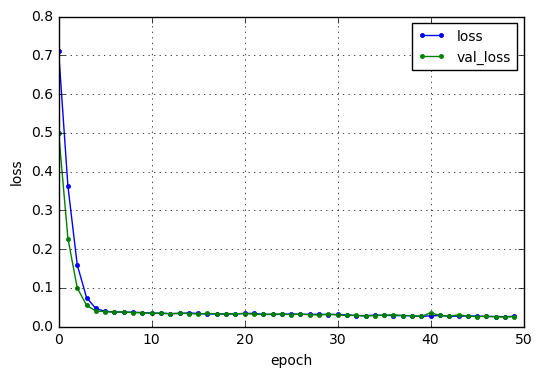

hiden node = 16
_dim=0016_Win=2048_Sld=0512_Adagrad
Train on 526 samples, validate on 526 samples
Epoch 1/50
0s - loss: 0.4053 - val_loss: 0.1126
Epoch 2/50
0s - loss: 0.0790 - val_loss: 0.0517
Epoch 3/50
0s - loss: 0.0567 - val_loss: 0.0775
Epoch 4/50
0s - loss: 0.0580 - val_loss: 0.0454
Epoch 5/50
0s - loss: 0.0449 - val_loss: 0.0417
Epoch 6/50
0s - loss: 0.0475 - val_loss: 0.0424
Epoch 7/50
0s - loss: 0.0452 - val_loss: 0.0425
Epoch 8/50
0s - loss: 0.0446 - val_loss: 0.0491
Epoch 9/50
0s - loss: 0.0437 - val_loss: 0.0403
Epoch 10/50
0s - loss: 0.0396 - val_loss: 0.0385
Epoch 11/50
0s - loss: 0.0390 - val_loss: 0.0372
Epoch 12/50
0s - loss: 0.0388 - val_loss: 0.0377
Epoch 13/50
0s - loss: 0.0385 - val_loss: 0.0370
Epoch 14/50
0s - loss: 0.0380 - val_loss: 0.0378
Epoch 15/50
0s - loss: 0.0369 - val_loss: 0.0373
Epoch 16/50
0s - loss: 0.0379 - val_loss: 0.0375
Epoch 17/50
0s - loss: 0.0373 - val_loss: 0.0370
Epoch 18/50
0s - loss: 0.0366 - val_loss: 0.0368
Epoch 19/50
0s - loss: 0.0371

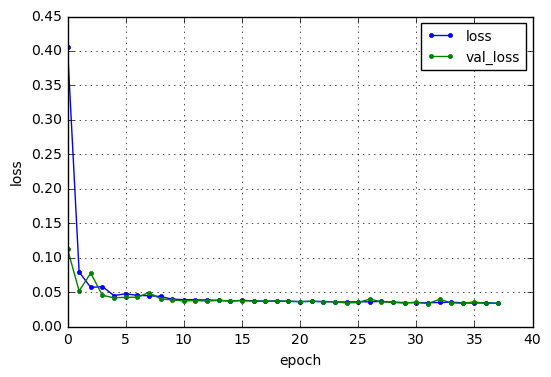

hiden node = 16
_dim=0016_Win=2048_Sld=0512_RMSprop
Train on 526 samples, validate on 526 samples
Epoch 1/50
0s - loss: 0.6288 - val_loss: 0.3871
Epoch 2/50
0s - loss: 0.2763 - val_loss: 0.1707
Epoch 3/50
0s - loss: 0.1223 - val_loss: 0.0832
Epoch 4/50
0s - loss: 0.0570 - val_loss: 0.0429
Epoch 5/50
0s - loss: 0.0407 - val_loss: 0.0360
Epoch 6/50
0s - loss: 0.0390 - val_loss: 0.0384
Epoch 7/50
0s - loss: 0.0401 - val_loss: 0.0399
Epoch 8/50
0s - loss: 0.0418 - val_loss: 0.0327
Epoch 9/50
0s - loss: 0.0394 - val_loss: 0.0403
Epoch 10/50
0s - loss: 0.0389 - val_loss: 0.0367
Epoch 11/50
0s - loss: 0.0389 - val_loss: 0.0369
Epoch 12/50
0s - loss: 0.0372 - val_loss: 0.0341
Epoch 13/50
0s - loss: 0.0428 - val_loss: 0.0330
Epoch 14/50
0s - loss: 0.0345 - val_loss: 0.0366
 32/526 [>.............................] - ETA: 0s

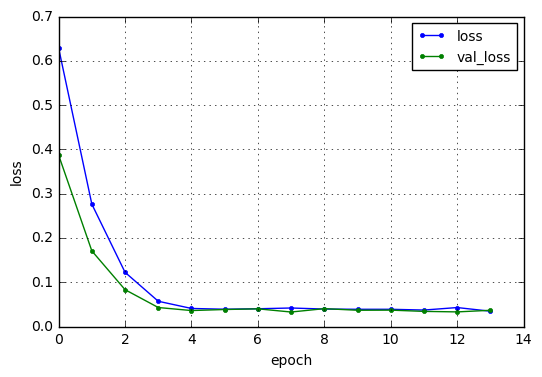

hiden node = 16
_dim=0016_Win=2048_Sld=0512_Nadam
Train on 526 samples, validate on 526 samples
Epoch 1/50
0s - loss: 0.6161 - val_loss: 0.3137
Epoch 2/50
0s - loss: 0.1814 - val_loss: 0.0796
Epoch 3/50
0s - loss: 0.0626 - val_loss: 0.0500
Epoch 4/50
0s - loss: 0.0493 - val_loss: 0.0476
Epoch 5/50
0s - loss: 0.0464 - val_loss: 0.0428
Epoch 6/50
0s - loss: 0.0504 - val_loss: 0.0448
Epoch 7/50
0s - loss: 0.0441 - val_loss: 0.0430
Epoch 8/50
0s - loss: 0.0484 - val_loss: 0.0454
Epoch 9/50
0s - loss: 0.0449 - val_loss: 0.0435
Epoch 10/50
0s - loss: 0.0448 - val_loss: 0.0440
Epoch 11/50
0s - loss: 0.0433 - val_loss: 0.0416
Epoch 12/50
0s - loss: 0.0418 - val_loss: 0.0445
Epoch 13/50
0s - loss: 0.0435 - val_loss: 0.0413
Epoch 14/50
0s - loss: 0.0426 - val_loss: 0.0413
Epoch 15/50
0s - loss: 0.0411 - val_loss: 0.0401
Epoch 16/50
0s - loss: 0.0403 - val_loss: 0.0391
Epoch 17/50
0s - loss: 0.0405 - val_loss: 0.0394
Epoch 18/50
0s - loss: 0.0394 - val_loss: 0.0386
Epoch 19/50
0s - loss: 0.0416 -

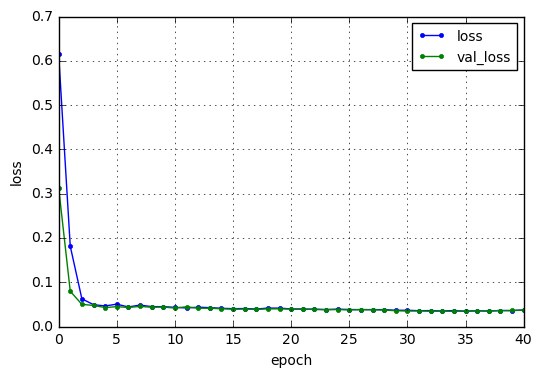

100%|██████████| 262/262 [00:00<00:00, 1502.05it/s]

AccX is registed now
Build Complete
Source shape is(1077870,)
window frames num =524
offset=805486.0
hiden node = 16
_dim=0016_Win=4096_Sld=1024_SGD


Train on 263 samples, validate on 263 samples
Epoch 1/50
0s - loss: 0.8507 - val_loss: 0.8500
Epoch 2/50
0s - loss: 0.8495 - val_loss: 0.8488
Epoch 3/50
0s - loss: 0.8484 - val_loss: 0.8477
Epoch 4/50
0s - loss: 0.8473 - val_loss: 0.8467
Epoch 5/50
0s - loss: 0.8463 - val_loss: 0.8457
Epoch 6/50
0s - loss: 0.8454 - val_loss: 0.8449
Epoch 7/50
0s - loss: 0.8446 - val_loss: 0.8441
Epoch 8/50
0s - loss: 0.8438 - val_loss: 0.8434
Epoch 9/50
0s - loss: 0.8431 - val_loss: 0.8426
Epoch 10/50
0s - loss: 0.8424 - val_loss: 0.8419
Epoch 11/50
0s - loss: 0.8417 - val_loss: 0.8413
Epoch 12/50
0s - loss: 0.8410 - val_loss: 0.8406
Epoch 13/50
0s - loss: 0.8403 - val_loss: 0.8399
Epoch 14/50
0s - loss: 0.8396 - val_loss: 0.8392
Epoch 15/50
0s - loss: 0.8389 - val_loss: 0.8385
Epoch 16/50
0s - loss: 0.8382 - val_loss: 0.8378
Epoch 17/50
0s - loss: 0.8375 - val_loss: 0.8370
Epoch 18/50
0s - loss: 0.8367 - val_loss: 0.8363
Epoch 19/50
0s - loss: 0.8360 - val_loss: 0.8356
Epoch 20/50
0s - loss: 0.8353 - 

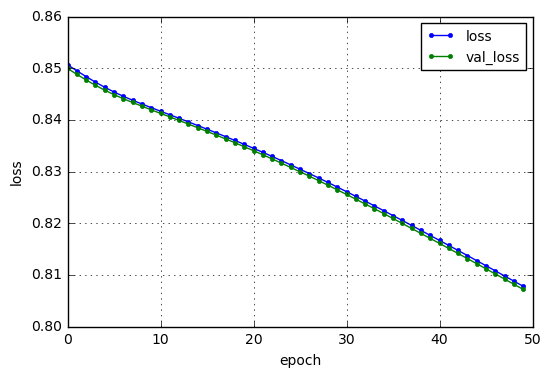

hiden node = 16
_dim=0016_Win=4096_Sld=1024_Adadelta
Train on 263 samples, validate on 263 samples
Epoch 1/50
0s - loss: 0.8282 - val_loss: 0.7858
Epoch 2/50
0s - loss: 0.7531 - val_loss: 0.7049
Epoch 3/50
0s - loss: 0.6747 - val_loss: 0.6310
Epoch 4/50
0s - loss: 0.6039 - val_loss: 0.5650
Epoch 5/50
0s - loss: 0.5406 - val_loss: 0.5053
Epoch 6/50
0s - loss: 0.4836 - val_loss: 0.4523
Epoch 7/50
0s - loss: 0.4329 - val_loss: 0.4049
Epoch 8/50
0s - loss: 0.3876 - val_loss: 0.3635
Epoch 9/50
0s - loss: 0.3481 - val_loss: 0.3259
Epoch 10/50
0s - loss: 0.3122 - val_loss: 0.2922
Epoch 11/50
0s - loss: 0.2801 - val_loss: 0.2626
Epoch 12/50
0s - loss: 0.2518 - val_loss: 0.2366
Epoch 13/50
0s - loss: 0.2270 - val_loss: 0.2130
Epoch 14/50
0s - loss: 0.2045 - val_loss: 0.1920
Epoch 15/50
0s - loss: 0.1845 - val_loss: 0.1736
Epoch 16/50
0s - loss: 0.1669 - val_loss: 0.1572
Epoch 17/50
0s - loss: 0.1513 - val_loss: 0.1427
Epoch 18/50
0s - loss: 0.1375 - val_loss: 0.1304
Epoch 19/50
0s - loss: 0.125

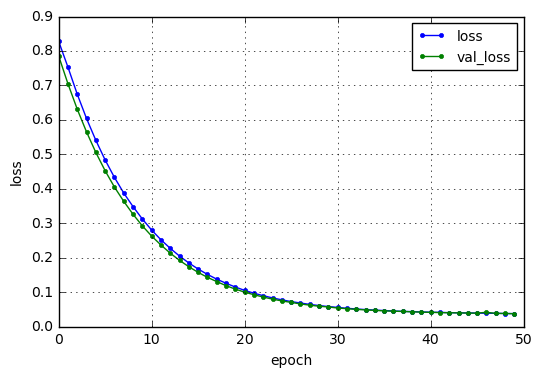

hiden node = 16
_dim=0016_Win=4096_Sld=1024_Adamax
Train on 263 samples, validate on 263 samples
Epoch 1/50
0s - loss: 0.7715 - val_loss: 0.5662
Epoch 2/50
0s - loss: 0.4424 - val_loss: 0.2911
Epoch 3/50
0s - loss: 0.2240 - val_loss: 0.1484
Epoch 4/50
0s - loss: 0.1178 - val_loss: 0.0856
Epoch 5/50
0s - loss: 0.0736 - val_loss: 0.0607
Epoch 6/50
0s - loss: 0.0570 - val_loss: 0.0520
Epoch 7/50
0s - loss: 0.0511 - val_loss: 0.0495
Epoch 8/50
0s - loss: 0.0486 - val_loss: 0.0475
Epoch 9/50
0s - loss: 0.0475 - val_loss: 0.0467
Epoch 10/50
0s - loss: 0.0463 - val_loss: 0.0456
Epoch 11/50
0s - loss: 0.0457 - val_loss: 0.0453
Epoch 12/50
0s - loss: 0.0454 - val_loss: 0.0461
Epoch 13/50
0s - loss: 0.0454 - val_loss: 0.0449
Epoch 14/50
0s - loss: 0.0450 - val_loss: 0.0450
Epoch 15/50
0s - loss: 0.0452 - val_loss: 0.0446
Epoch 16/50
0s - loss: 0.0443 - val_loss: 0.0437
Epoch 17/50
0s - loss: 0.0439 - val_loss: 0.0436
Epoch 18/50
0s - loss: 0.0434 - val_loss: 0.0430
Epoch 19/50
0s - loss: 0.0427 

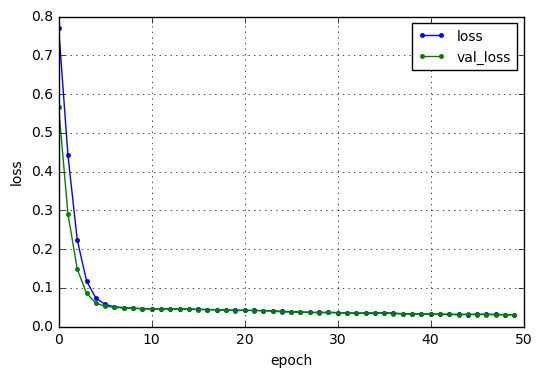

hiden node = 16
_dim=0016_Win=4096_Sld=1024_Adam
Train on 263 samples, validate on 263 samples
Epoch 1/50
0s - loss: 0.7907 - val_loss: 0.6713
Epoch 2/50
0s - loss: 0.5883 - val_loss: 0.4718
Epoch 3/50
0s - loss: 0.4045 - val_loss: 0.3139
Epoch 4/50
0s - loss: 0.2661 - val_loss: 0.2035
Epoch 5/50
0s - loss: 0.1721 - val_loss: 0.1325
Epoch 6/50
0s - loss: 0.1142 - val_loss: 0.0908
Epoch 7/50
0s - loss: 0.0805 - val_loss: 0.0676
Epoch 8/50
0s - loss: 0.0627 - val_loss: 0.0564
Epoch 9/50
0s - loss: 0.0532 - val_loss: 0.0500
Epoch 10/50
0s - loss: 0.0489 - val_loss: 0.0465
Epoch 11/50
0s - loss: 0.0459 - val_loss: 0.0446
Epoch 12/50
0s - loss: 0.0443 - val_loss: 0.0433
Epoch 13/50
0s - loss: 0.0435 - val_loss: 0.0423
Epoch 14/50
0s - loss: 0.0417 - val_loss: 0.0410
Epoch 15/50
0s - loss: 0.0416 - val_loss: 0.0411
Epoch 16/50
0s - loss: 0.0412 - val_loss: 0.0411
Epoch 17/50
0s - loss: 0.0415 - val_loss: 0.0401
Epoch 18/50
0s - loss: 0.0399 - val_loss: 0.0398
Epoch 19/50
0s - loss: 0.0397 - 

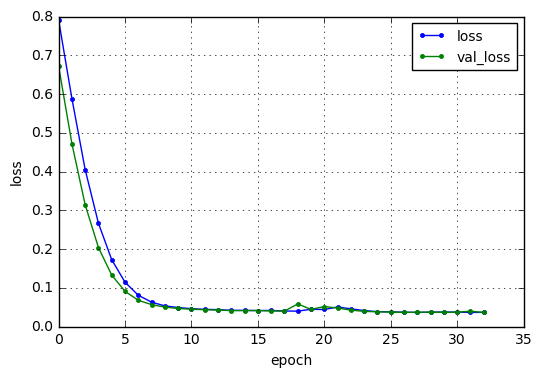

hiden node = 16
_dim=0016_Win=4096_Sld=1024_Adagrad
Train on 263 samples, validate on 263 samples
Epoch 1/50
0s - loss: 0.5578 - val_loss: 0.2067
Epoch 2/50
0s - loss: 0.1448 - val_loss: 0.0901
Epoch 3/50
0s - loss: 0.0770 - val_loss: 0.0639
Epoch 4/50
0s - loss: 0.0609 - val_loss: 0.0568
Epoch 5/50
0s - loss: 0.0551 - val_loss: 0.0539
Epoch 6/50
0s - loss: 0.0535 - val_loss: 0.0520
Epoch 7/50
0s - loss: 0.0515 - val_loss: 0.0749
Epoch 8/50
0s - loss: 0.0644 - val_loss: 0.0540
Epoch 9/50
0s - loss: 0.0519 - val_loss: 0.0500
Epoch 10/50
0s - loss: 0.0515 - val_loss: 0.0477
Epoch 11/50
0s - loss: 0.0519 - val_loss: 0.0480
Epoch 12/50
0s - loss: 0.0494 - val_loss: 0.0458
Epoch 13/50
0s - loss: 0.0456 - val_loss: 0.0443
Epoch 14/50
0s - loss: 0.0458 - val_loss: 0.0451
Epoch 15/50
0s - loss: 0.0449 - val_loss: 0.0445
Epoch 16/50
0s - loss: 0.0445 - val_loss: 0.0442
Epoch 17/50
0s - loss: 0.0443 - val_loss: 0.0444
Epoch 18/50
0s - loss: 0.0444 - val_loss: 0.0440
Epoch 19/50
0s - loss: 0.0441

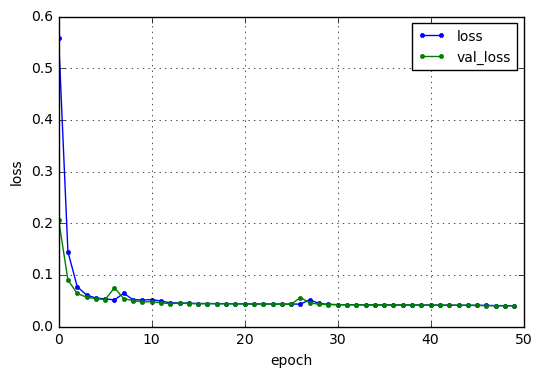

hiden node = 16
_dim=0016_Win=4096_Sld=1024_RMSprop
Train on 263 samples, validate on 263 samples
Epoch 1/50
0s - loss: 0.7151 - val_loss: 0.5191
Epoch 2/50
0s - loss: 0.4416 - val_loss: 0.3356
Epoch 3/50
0s - loss: 0.2875 - val_loss: 0.2170
Epoch 4/50
0s - loss: 0.1830 - val_loss: 0.1383
Epoch 5/50
0s - loss: 0.1221 - val_loss: 0.0867
Epoch 6/50
0s - loss: 0.0749 - val_loss: 0.0595
Epoch 7/50
0s - loss: 0.0609 - val_loss: 0.0459
Epoch 8/50
0s - loss: 0.0546 - val_loss: 0.0462
Epoch 9/50
0s - loss: 0.0576 - val_loss: 0.0497
Epoch 10/50
0s - loss: 0.0518 - val_loss: 0.0522
Epoch 11/50
0s - loss: 0.0497 - val_loss: 0.0415
Epoch 12/50
0s - loss: 0.0544 - val_loss: 0.0448
Epoch 13/50
0s - loss: 0.0418 - val_loss: 0.0395
Epoch 14/50
0s - loss: 0.0518 - val_loss: 0.0426
Epoch 15/50
0s - loss: 0.0463 - val_loss: 0.0438
Epoch 16/50
0s - loss: 0.0478 - val_loss: 0.0418
Epoch 17/50
0s - loss: 0.0452 - val_loss: 0.0385
Epoch 18/50
0s - loss: 0.0392 - val_loss: 0.0679
Epoch 19/50
0s - loss: 0.0502

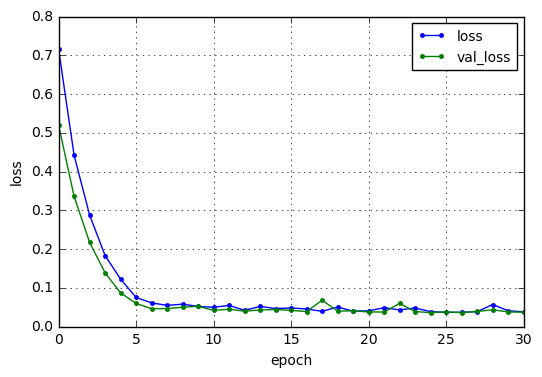

hiden node = 16
_dim=0016_Win=4096_Sld=1024_Nadam
Train on 263 samples, validate on 263 samples
Epoch 1/50
0s - loss: 0.7509 - val_loss: 0.5475
Epoch 2/50
0s - loss: 0.4307 - val_loss: 0.2813
Epoch 3/50
0s - loss: 0.2273 - val_loss: 0.1788
Epoch 4/50
0s - loss: 0.1318 - val_loss: 0.0958
Epoch 5/50
0s - loss: 0.0781 - val_loss: 0.0599
Epoch 6/50
0s - loss: 0.0676 - val_loss: 0.0639
Epoch 7/50
0s - loss: 0.0566 - val_loss: 0.0504
Epoch 8/50
0s - loss: 0.0491 - val_loss: 0.0467
Epoch 9/50
0s - loss: 0.0506 - val_loss: 0.0581
Epoch 10/50
0s - loss: 0.0525 - val_loss: 0.0465
Epoch 11/50
0s - loss: 0.0500 - val_loss: 0.0668
Epoch 12/50
0s - loss: 0.0568 - val_loss: 0.0464
Epoch 13/50
0s - loss: 0.0486 - val_loss: 0.0438
Epoch 14/50
0s - loss: 0.0465 - val_loss: 0.0464
Epoch 15/50
0s - loss: 0.0460 - val_loss: 0.0465
Epoch 16/50
0s - loss: 0.0465 - val_loss: 0.0451
Epoch 17/50
0s - loss: 0.0450 - val_loss: 0.0461
Epoch 18/50
0s - loss: 0.0462 - val_loss: 0.0458
Epoch 19/50
0s - loss: 0.0458 -

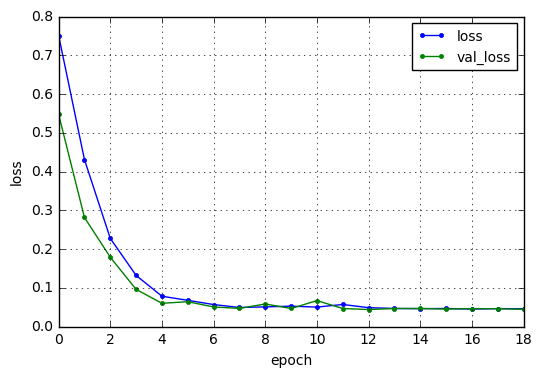

In [21]:
# loop windowWidth
for WindowNum,SlidingNum in zip(WindowWidth,SlidingWidth):
    w=window()
    w.SetData('AccX',TrimData[0]['AccX'])
    wind=w.Compile(windowWidth=WindowNum,slidingWidth=SlidingNum)
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))
    
    for opt,optName in zip(optimizers,optimArray):
        print "hiden node = "+str(AEDimention)
        CommonName='_dim='+str(AEDimention).zfill(4)+'_Win='+str(WindowNum).zfill(4)+'_Sld='+str(SlidingNum).zfill(4)+'_'+optName
        print CommonName
        
        np.savez(WindowDataPath+CommonName+'_Test',data=windoW)
        np.savez(WindowDataPath+CommonName+'_Train',data=windoW)
        
        AutoEncoder(windoW,windoW,AEDimention,optName,CommonName)

In [22]:
print 'finish'

finish


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 0s - loss: 189.2417 - val_loss: 171.3908
Epoch 2/50
60000/60000 [==============================] - 0s - loss: 169.2316 - val_loss: 167.6344
Epoch 3/50
60000/60000 [==============================] - 0s - loss: 165.7284 - val_loss: 164.8322
Epoch 4/50
60000/60000 [==============================] - 0s - loss: 163.4858 - val_loss: 162.7320
Epoch 5/50
60000/60000 [==============================] - 0s - loss: 161.5967 - val_loss: 161.0225
Epoch 6/50
60000/60000 [==============================] - 0s - loss: 160.0805 - val_loss: 159.6159
Epoch 7/50
60000/60000 [==============================] - 0s - loss: 158.8837 - val_loss: 158.8812
Epoch 8/50
60000/60000 [==============================] - 0s - loss: 157.9681 - val_loss: 157.6048
Epoch 9/50
60000/60000 [==============================] - 0s - loss: 157.2785 - val_loss: 157.1061
Epoch 10/50
60000/60000 [==============================] - 

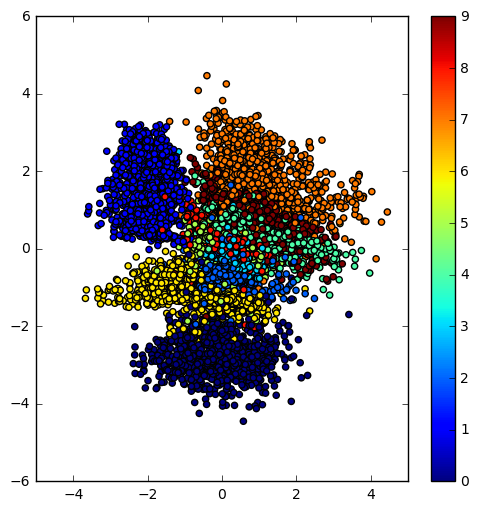

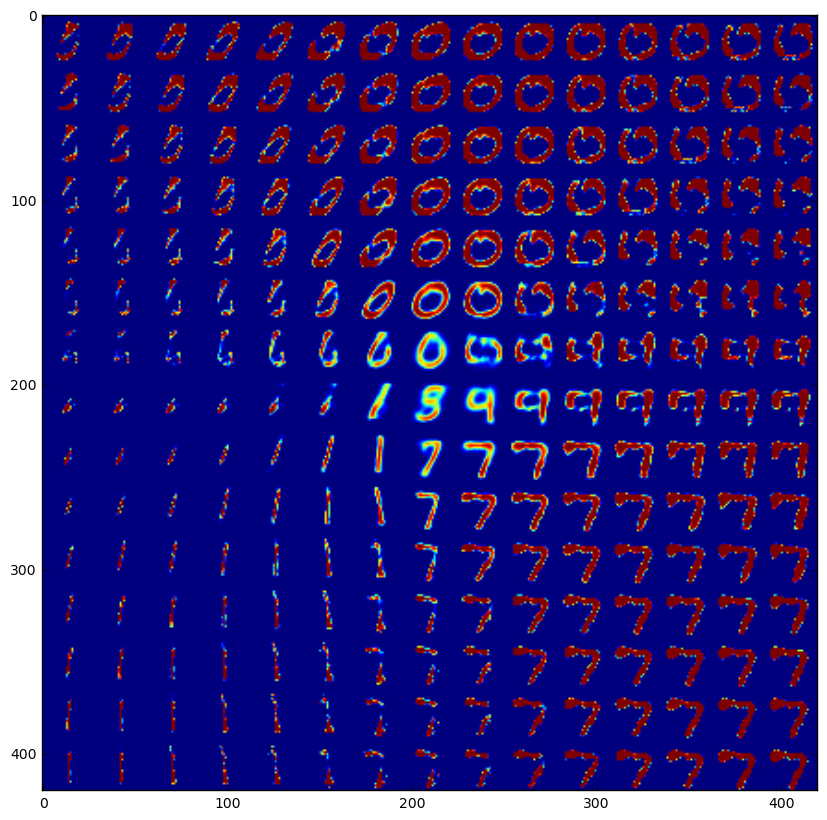

In [23]:
'''This script demonstrates how to build a variational autoencoder with Keras.
Reference: "Auto-Encoding Variational Bayes" https://arxiv.org/abs/1312.6114
'''
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import objectives
from keras.datasets import mnist

batch_size = 100
original_dim = 784
latent_dim = 2
intermediate_dim = 256
nb_epoch = 50
epsilon_std = 1.0

x = Input(batch_shape=(batch_size, original_dim))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)


def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.,
                              std=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# we instantiate these layers separately so as to reuse them later
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)


def vae_loss(x, x_decoded_mean):
    xent_loss = original_dim * objectives.binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return xent_loss + kl_loss

vae = Model(x, x_decoded_mean)
vae.compile(optimizer='rmsprop', loss=vae_loss)

# train the VAE on MNIST digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

plot(vae,  to_file='vae_network_image.png')

vae.fit(x_train, x_train,
        shuffle=True,
        nb_epoch=nb_epoch,
        batch_size=batch_size,
        validation_data=(x_test, x_test))

# build a model to project inputs on the latent space
encoder = Model(x, z_mean)

# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

# build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

In [24]:
x_test_encoded.shape

(10000, 2)

In [25]:
x_test.shape

(10000, 784)

In [ ]:
 windoW.shape